In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv(r"C:\Users\Supravo Biswas\Desktop\SUVUpoject\EarthquakeFeatures.csv", sep=",", on_bad_lines="skip")


In [60]:
df.sample(10)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity
11107,-7.674361e+04,3.780386e+06,27395,ISC,2011,1,24,16,36,11.82,34.005600,74.758900,4.8,10.00,4.800,NaN,68884.28552,NaN
11574,-1.912755e+05,3.686834e+06,20913,ISC,1996,9,18,4,22,20.00,33.099998,73.599998,4.8,33.00,4.800,Mangla Fault,36198.35920,NaN
13254,3.146376e+04,4.022597e+06,42989,NEIC,2014,12,24,5,38,33.44,36.234700,75.788100,4.1,74.09,4.515,Karakoram Fault,271478.63120,NaN
4896,1.779837e+06,7.850647e+05,18173,ISC,2004,12,27,6,50,28.00,6.960000,92.510002,4.2,30.00,4.600,NaN,81443.08630,NaN
14743,7.636210e+04,3.605658e+06,28021,ISC,2009,1,31,3,7,15.99,32.507500,76.491900,4.0,11.50,4.430,Karakoram Fault,259131.27940,0.088879
9386,1.975939e+06,2.960753e+06,1777,ISC,1968,1,23,3,22,46.00,26.010000,95.650002,4.8,96.00,5.110,NaN,152502.40310,NaN
4145,1.953367e+06,9.629607e+05,13552,ISC,2005,1,27,22,19,20.08,8.486900,94.093600,4.4,87.20,4.770,NaN,10936.92441,NaN
14960,-6.163963e+05,2.642650e+06,24095,ISC,2001,5,17,12,26,3.00,23.510000,70.110001,3.9,26.00,4.345,Kutch Mainland Fault,10617.05661,NaN
4465,1.956698e+06,9.234742e+05,17020,ISC,2005,1,20,10,48,32.48,8.138100,94.111300,4.4,43.70,4.770,NaN,46941.90757,NaN
14339,5.440836e+04,3.727038e+06,18434,ISC,2002,10,18,2,40,38.00,33.590000,76.199997,4.8,33.00,4.800,Karakoram Fault,188816.90940,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16495 entries, 0 to 16494
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             16495 non-null  float64
 1   Y             16495 non-null  float64
 2   OBJECTID      16495 non-null  int64  
 3   SOURCE        16492 non-null  object 
 4   YR            16495 non-null  int64  
 5   MO            16495 non-null  int64  
 6   DT            16495 non-null  int64  
 7   HR            16495 non-null  int64  
 8   MN            16495 non-null  int64  
 9   SEC           16495 non-null  float64
 10  LAT           16495 non-null  float64
 11  LONG_         16495 non-null  float64
 12  MAGMB         16495 non-null  float64
 13  DEPTH_KM      16495 non-null  float64
 14  MW            16495 non-null  float64
 15  HubName       9712 non-null   object 
 16  HubDist       16495 non-null  float64
 17  FaultDensity  2423 non-null   float64
dtypes: float64(10), int64(6), 

In [62]:
df.isnull().sum()

X                   0
Y                   0
OBJECTID            0
SOURCE              3
YR                  0
MO                  0
DT                  0
HR                  0
MN                  0
SEC                 0
LAT                 0
LONG_               0
MAGMB               0
DEPTH_KM            0
MW                  0
HubName          6783
HubDist             0
FaultDensity    14072
dtype: int64

In [63]:
import pandas as pd

# Load your dataframe (assume it's already loaded into `df`)

if 'place' in df.columns:
    # 🅰 Dataset Type A — Global
    df_india = df[df['place'].str.contains('India', case=False, na=False)].copy()

    # Parse time and create 'year_month'
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
    df_india['month'] = df_india['time'].dt.month
    df_india['day'] = df_india['time'].dt.day
    df_india['hour'] = df_india['time'].dt.hour
    df_india['minute'] = df_india['time'].dt.minute
    df_india['second'] = df_india['time'].dt.second

    # Optional: standardize columns for further analysis
    df_india.rename(columns={'latitude': 'LAT', 'longitude': 'LONG_', 'mag': 'MAGMB', 'depth': 'DEPTH_KM'}, inplace=True)

else:
    # Dataset Type B — Already India-specific
    df_india = df.copy()

    # Combine YR, MO, DT, HR, MN, SEC into a datetime
    date_cols = ['YR', 'MO', 'DT', 'HR', 'MN', 'SEC']
    for col in date_cols:
        df_india[col] = pd.to_numeric(df_india[col], errors='coerce').fillna(0).astype(int)

    # Safely create datetime (default time to 0 if missing)
    df_india['time'] = pd.to_datetime(dict(
        year=df_india['YR'],
        month=df_india['MO'],
        day=df_india['DT'],
        hour=df_india['HR'],
        minute=df_india['MN'],
        second=df_india['SEC']
    ), errors='coerce')

    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')

# ✅ Now df_india is clean and time-aware, ready for analysis



In [64]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16494 entries, 0 to 16494
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             16494 non-null  float64       
 1   Y             16494 non-null  float64       
 2   OBJECTID      16494 non-null  int64         
 3   SOURCE        16491 non-null  object        
 4   YR            16494 non-null  int64         
 5   MO            16494 non-null  int64         
 6   DT            16494 non-null  int64         
 7   HR            16494 non-null  int64         
 8   MN            16494 non-null  int64         
 9   SEC           16494 non-null  int64         
 10  LAT           16494 non-null  float64       
 11  LONG_         16494 non-null  float64       
 12  MAGMB         16494 non-null  float64       
 13  DEPTH_KM      16494 non-null  float64       
 14  MW            16494 non-null  float64       
 15  HubName       9711 non-null   object     

In [65]:
df_india.isnull().sum()

X                   0
Y                   0
OBJECTID            0
SOURCE              3
YR                  0
MO                  0
DT                  0
HR                  0
MN                  0
SEC                 0
LAT                 0
LONG_               0
MAGMB               0
DEPTH_KM            0
MW                  0
HubName          6783
HubDist             0
FaultDensity    14072
time                0
year_month          0
dtype: int64

In [66]:
df_india.sample(20)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity,time,year_month
12224,-2.148392e+05,3.881837e+06,34402,ISC,2005,10,8,11,23,30,34.827500,73.191100,4.3,24.9,4.685,Mangla Fault,163809.54980,NaN,2005-10-08 11:23:30,2005-10
11031,-1.953298e+05,3.809072e+06,35275,ISC,2005,10,11,11,51,17,34.190500,73.461700,3.8,10.0,4.260,Mangla Fault,89031.71869,NaN,2005-10-11 11:51:17,2005-10
13099,-9.449403e+04,4.015266e+06,17623,ISC,2003,11,25,19,4,48,36.099998,74.400002,4.0,33.0,4.430,Karakoram Fault,364769.26570,NaN,2003-11-25 19:04:48,2003-11
3583,1.927770e+06,8.890736e+05,16674,ISC,2005,1,19,3,47,26,7.843100,93.845800,4.2,33.0,4.600,NaN,80755.98677,5.427438,2005-01-19 03:47:26,2005-01
4937,1.829466e+06,1.142389e+06,4756,ISC,1978,3,25,9,21,38,10.110000,93.050003,4.7,73.0,5.025,West Andaman Fault,138645.74230,NaN,1978-03-25 09:21:38,1978-03
1891,1.890364e+06,1.391798e+06,9736,ISC,1990,12,25,1,6,59,12.290000,93.690002,4.9,27.0,5.195,West Andaman Fault,251840.62520,NaN,1990-12-25 01:06:59,1990-12
7275,7.299354e+05,3.357988e+06,26244,ISC,2008,1,27,20,57,35,30.331900,83.391700,3.3,15.5,3.835,NaN,324099.39810,NaN,2008-01-27 20:57:35,2008-01
13199,-3.001376e+04,3.943098e+06,13637,ISC,2002,12,19,23,18,8,35.490002,75.160004,3.5,16.0,4.005,Karakoram Fault,273729.17190,NaN,2002-12-19 23:18:08,2002-12
11584,6.937003e+04,3.586096e+06,41793,NEIC,2014,8,21,8,11,18,32.328900,76.426600,4.9,10.0,5.195,Karakoram Fault,279370.82200,NaN,2014-08-21 08:11:18,2014-08
11449,4.645539e+04,3.656200e+06,3950,ISC,1976,1,8,22,34,25,32.950001,76.150002,4.8,43.0,5.110,Karakoram Fault,238666.73350,NaN,1976-01-08 22:34:25,1976-01


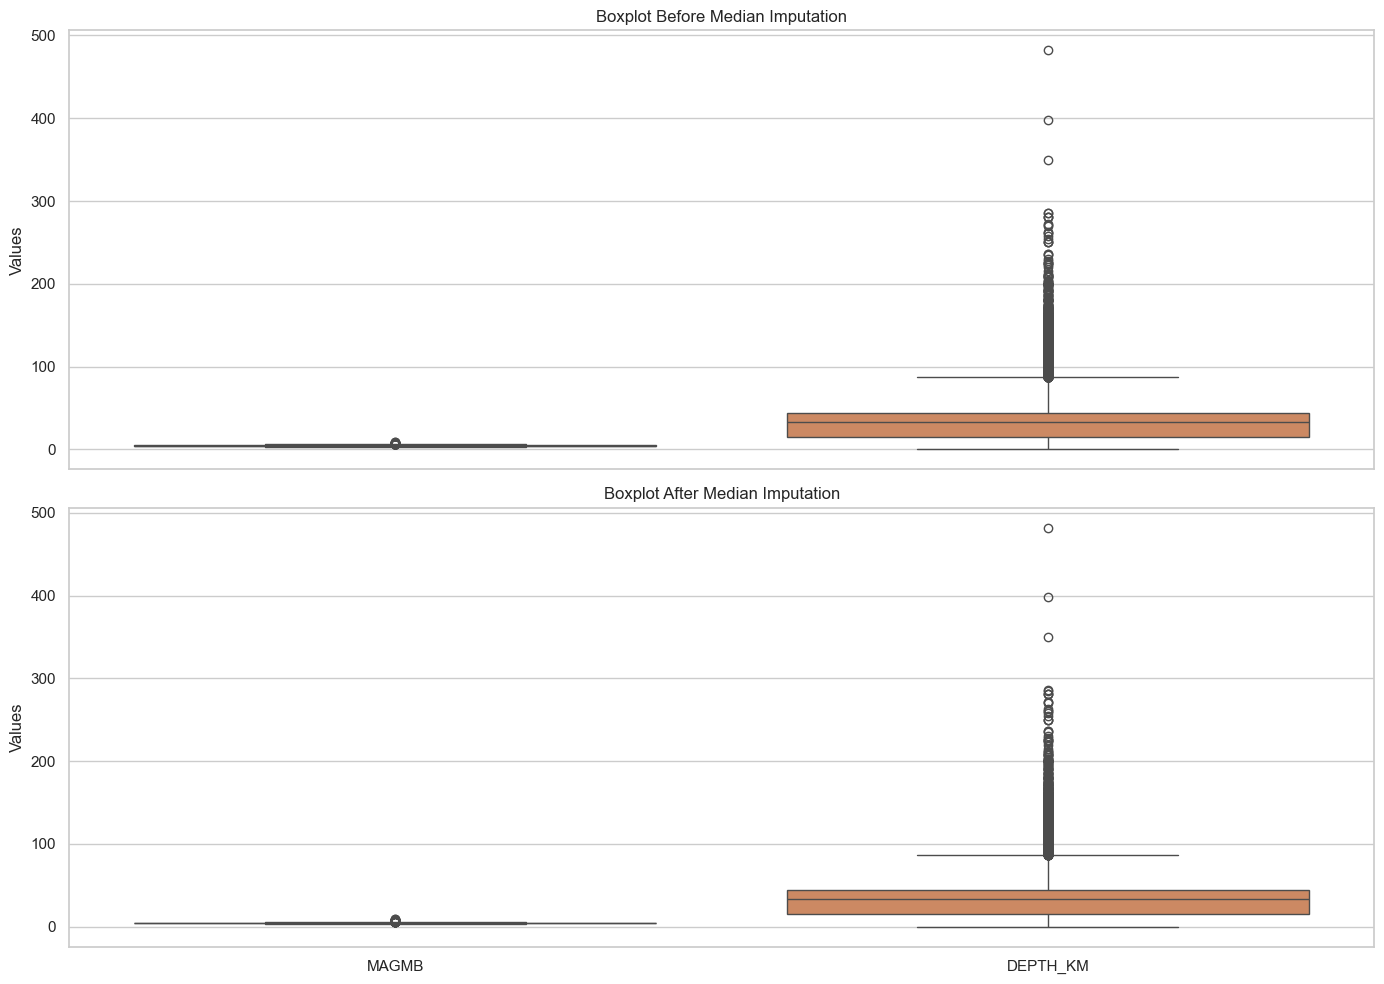

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define potential NA columns for both datasets
global_na_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_fallback_cols = ['MAGMB', 'DEPTH_KM']

# Check which ones are actually present in df_india
columns_with_na = [col for col in global_na_cols if col in df_india.columns]

# Fallback: use MAGMB and DEPTH_KM if global_na_cols are missing
if not columns_with_na:
    columns_with_na = [col for col in india_fallback_cols if col in df_india.columns]

# Proceed only if we have some numeric columns
if columns_with_na:
    # Extract and copy the relevant columns
    df_before = df_india[columns_with_na].copy()
    df_after = df_before.copy()

    # Impute missing values with median
    for col in columns_with_na:
        median_val = df_after[col].median()
        df_after[col] = df_after[col].fillna(median_val)

    # Plot before and after boxplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

    # Before Imputation
    sns.boxplot(data=df_before, ax=axes[0])
    axes[0].set_title("Boxplot Before Median Imputation")
    axes[0].set_ylabel("Values")

    # After Imputation
    sns.boxplot(data=df_after, ax=axes[1])
    axes[1].set_title("Boxplot After Median Imputation")
    axes[1].set_ylabel("Values")

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No suitable numeric columns found for imputation or boxplotting.")

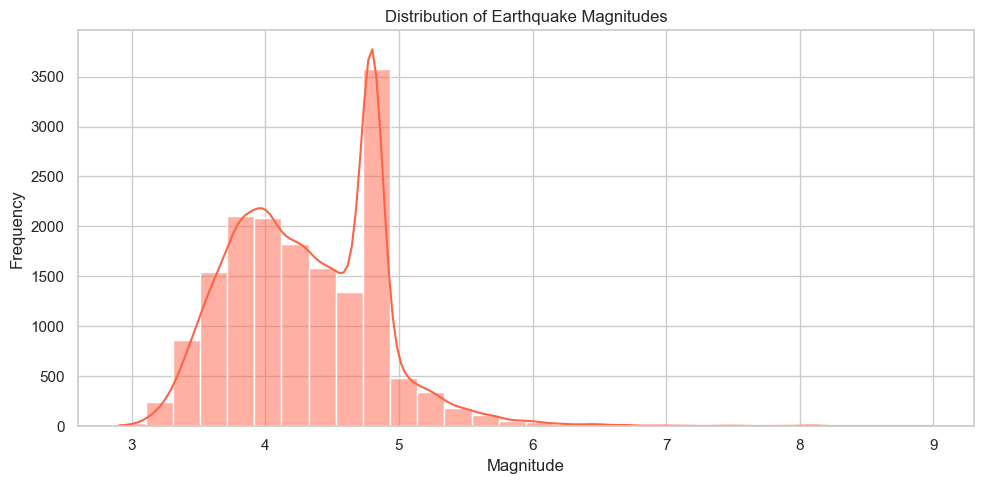

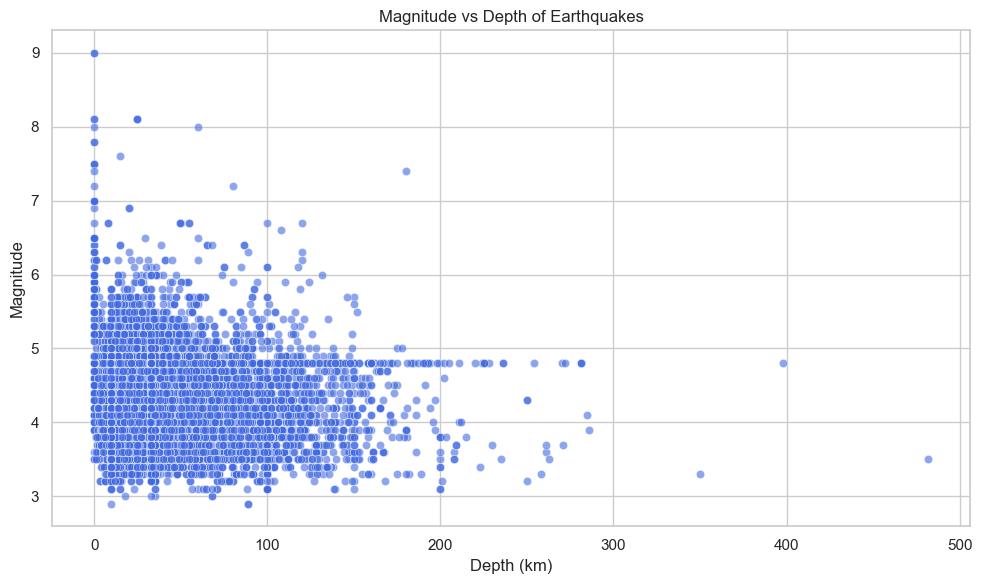

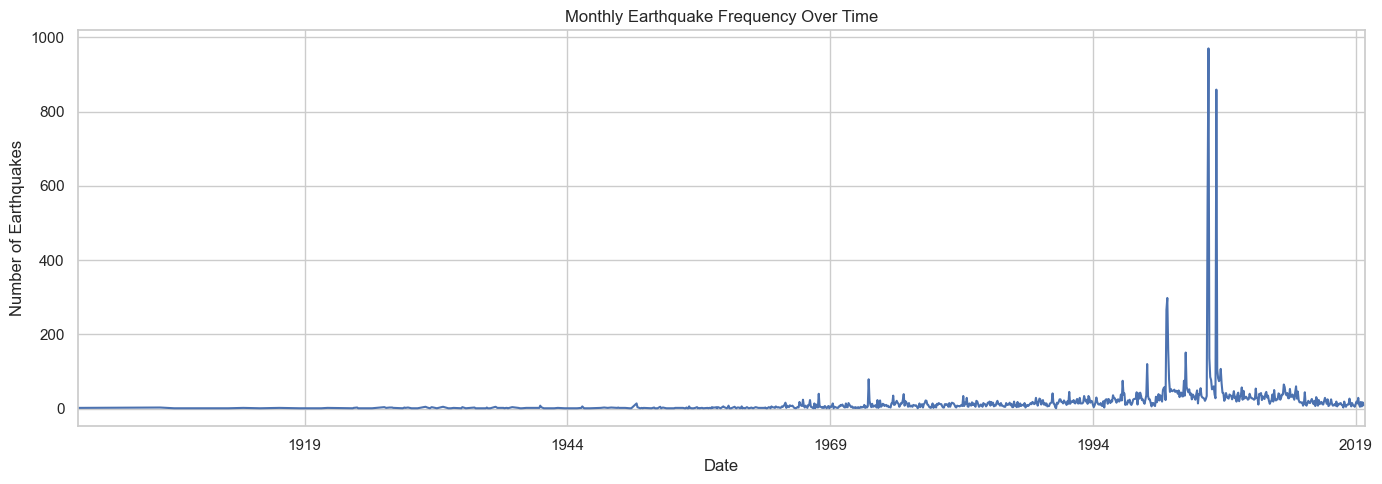

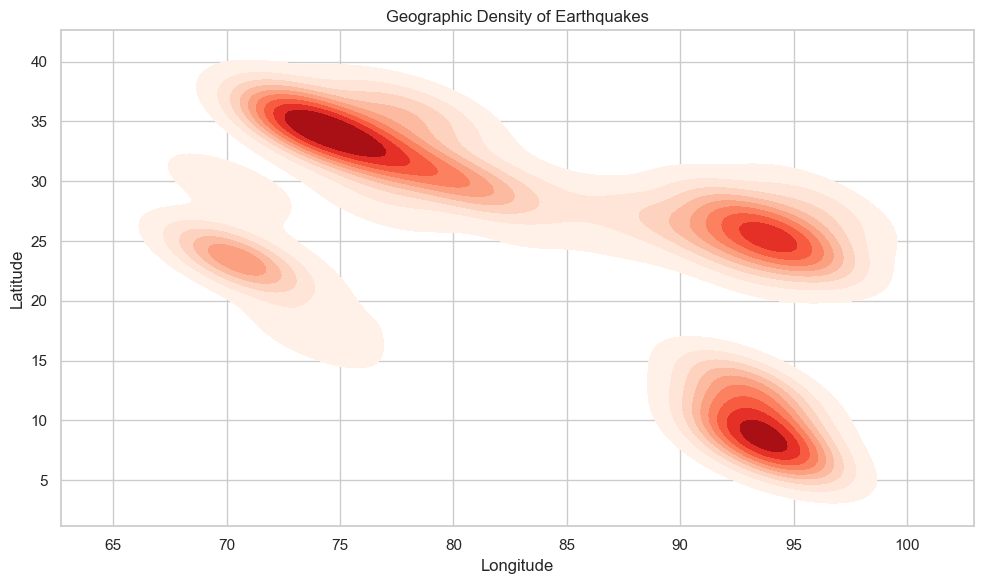

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 🌐 Define fallback mappings for key columns
col_map = {
    'mag': 'mag' if 'mag' in df_india.columns else 'MAGMB',
    'depth': 'depth' if 'depth' in df_india.columns else 'DEPTH_KM',
    'latitude': 'latitude' if 'latitude' in df_india.columns else 'LAT',
    'longitude': 'longitude' if 'longitude' in df_india.columns else 'LONG_',
    'place': 'place' if 'place' in df_india.columns else None
}

# 1. 📊 Distribution of Earthquake Magnitudes
if col_map['mag'] in df_india.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_india[col_map['mag']], bins=30, kde=True, color='tomato')
    plt.title('Distribution of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. 🏙️ Top 10 Locations with Most Earthquakes (only if 'place' exists)
if col_map['place']:
    top_places = df_india[col_map['place']].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=top_places.values,
        y=top_places.index,
        hue=top_places.index,
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title('Top 10 Locations with Most Earthquakes')
    plt.xlabel('Number of Earthquakes')
    plt.ylabel('Place')
    plt.tight_layout()
    plt.show()

# 3. 🎯 Magnitude vs Depth Scatter Plot
if col_map['mag'] in df_india.columns and col_map['depth'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_india,
        x=col_map['depth'],
        y=col_map['mag'],
        alpha=0.6,
        color='royalblue'
    )
    plt.title('Magnitude vs Depth of Earthquakes')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

# 4. 🕒 Earthquakes Over Time (Monthly)
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')
    monthly_counts = df_india.groupby('year_month').size()

    plt.figure(figsize=(14, 5))
    monthly_counts.plot()
    plt.title('Monthly Earthquake Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Earthquakes')
    plt.tight_layout()
    plt.show()

# 5. 🌍 Earthquake Location Heatmap
if col_map['latitude'] in df_india.columns and col_map['longitude'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=df_india[col_map['longitude']],
        y=df_india[col_map['latitude']],
        cmap="Reds",
        fill=True,
        thresh=0.05
    )
    plt.title('Geographic Density of Earthquakes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

✅ Risk level classified using 'MW' column.


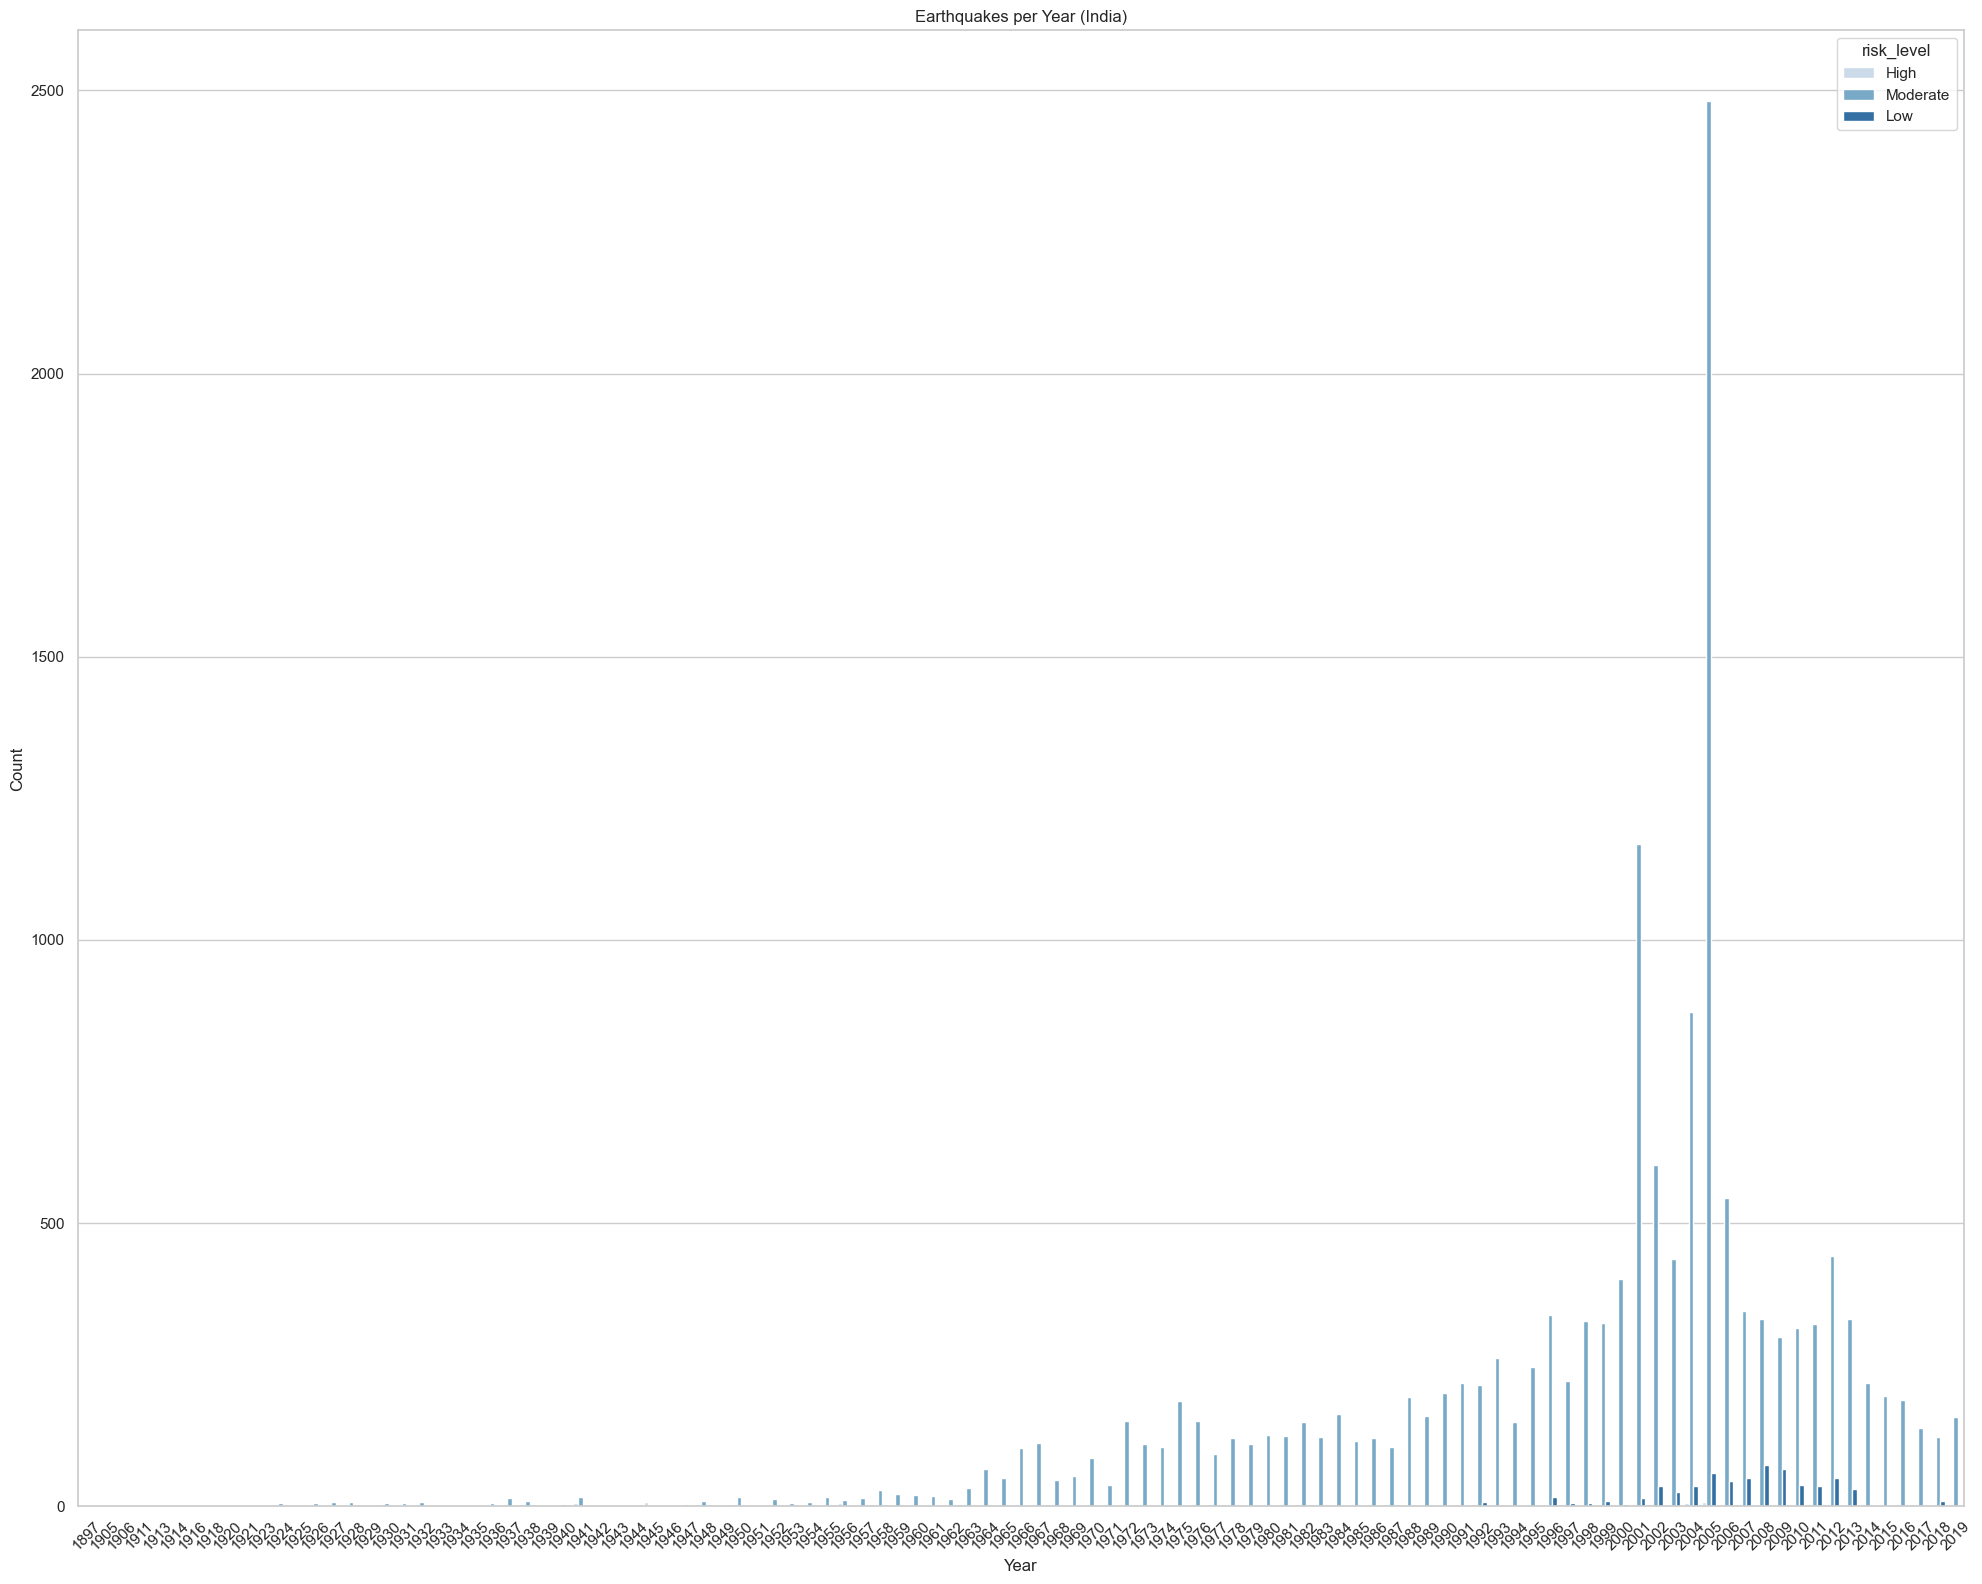

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' column is parsed
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ No 'time' column found.")

# Dynamically determine magnitude column for risk classification
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# Add 'risk_level' if not already added
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'

    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)
    print(f"✅ Risk level classified using '{mag_col}' column.")

# Plot if both 'year' and 'risk_level' are present
if 'year' in df_india.columns and 'risk_level' in df_india.columns:
    plt.figure(figsize=(20, 16))
    sns.countplot(x='year', hue='risk_level', data=df_india, palette='Blues')
    plt.title('Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns 'year' or 'risk_level' not found for plotting.")

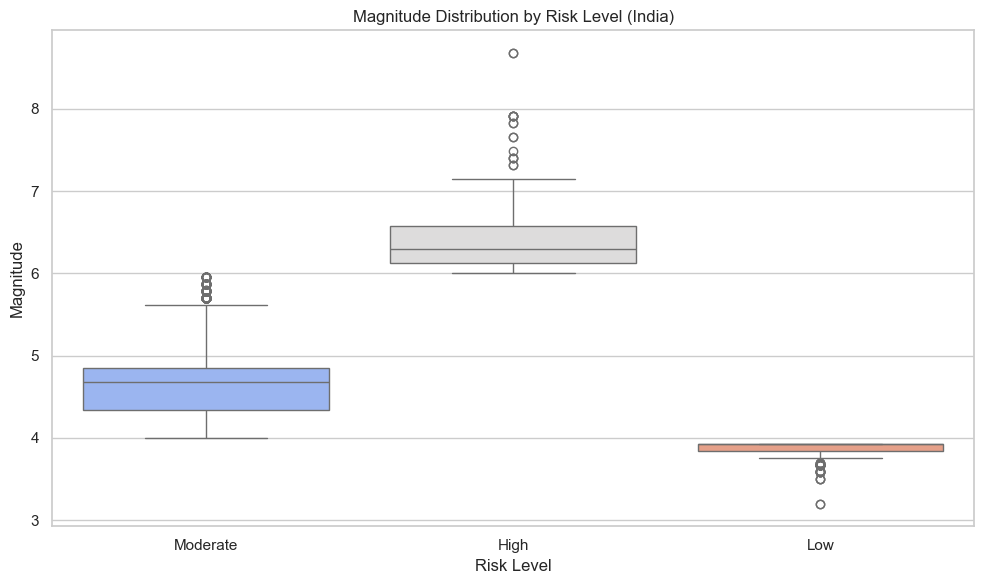

In [70]:
#Magnitude Distribution by Risk Level
# 🔍 Determine magnitude column again if needed
if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Only plot if required columns exist
if 'risk_level' in df_india.columns and mag_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='risk_level',
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='coolwarm',
        legend=False
    )
    plt.title('Magnitude Distribution by Risk Level (India)')
    plt.xlabel('Risk Level')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot boxplot — 'risk_level' or valid magnitude column is missing.")


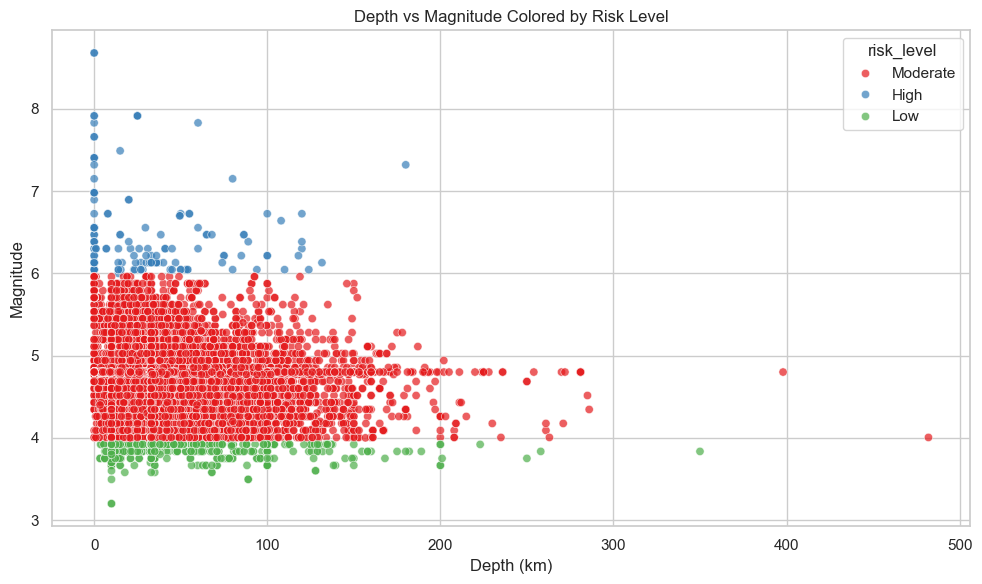

In [71]:
# 🔁 Dynamically re-identify depth and magnitude columns
depth_col = None
for col in ['depth', 'DEPTH_KM']:
    if col in df_india.columns:
        depth_col = col
        break

if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Plot if all required columns are present
if depth_col and mag_col and 'risk_level' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=depth_col,
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='Set1',
        alpha=0.7
    )
    plt.title('Depth vs Magnitude Colored by Risk Level')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot scatter: Required columns missing — check depth, magnitude, or risk_level.")

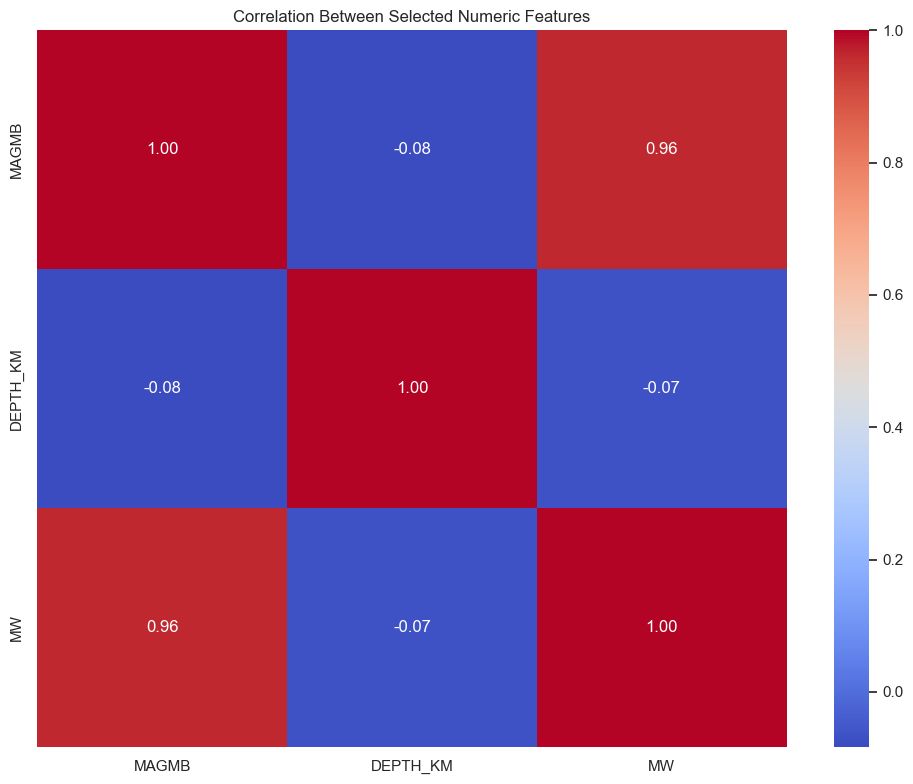

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define possible global NA columns and India fallback numeric columns
possible_corr_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_numeric_cols = ['MAGMB', 'DEPTH_KM', 'MW']

# Dynamically find available numeric columns
columns_with_na = [col for col in possible_corr_cols if col in df_india.columns]

# Fallback to India-specific numeric columns if none found
if not columns_with_na:
    columns_with_na = [col for col in india_numeric_cols if col in df_india.columns]

# ✅ Plot heatmap only if at least 2 numeric columns exist
if len(columns_with_na) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df_india[columns_with_na].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns found for correlation heatmap.")

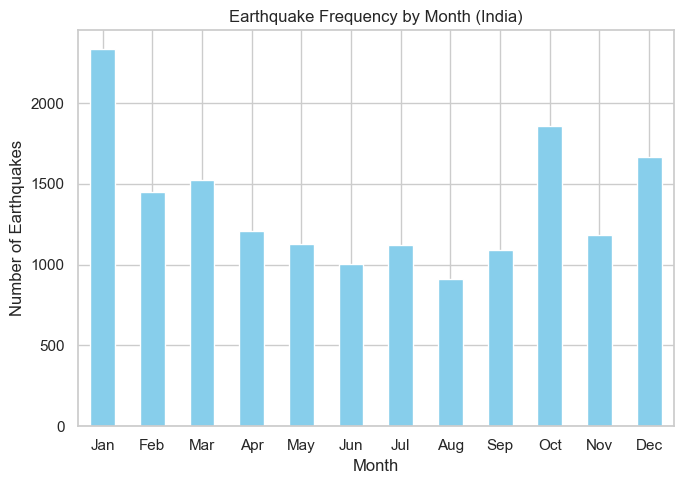

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Ensure 'time' column is datetime
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)

    # ✅ Create 'month' column if not already present
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month

    # ✅ Group and count earthquakes per month
    monthly_counts = df_india.groupby('month').size().reindex(range(1, 13), fill_value=0)

    # ✅ Plotting
    plt.figure(figsize=(7, 5))
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title('Earthquake Frequency by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Number of Earthquakes')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ 'time' column missing. Cannot extract or group by month.")

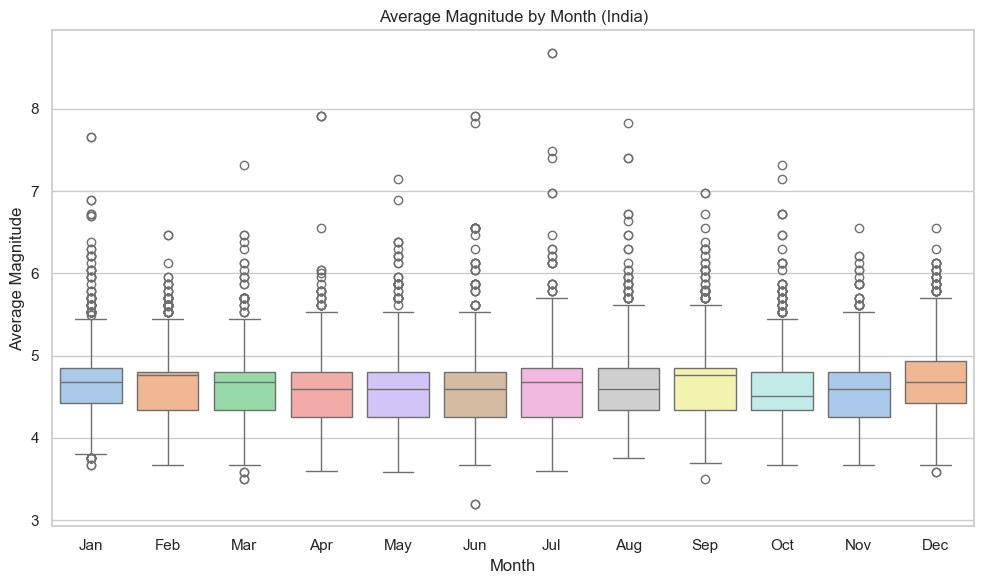

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Find appropriate magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' is datetime and extract 'month'
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month
else:
    print("⚠️ 'time' column is missing or invalid.")

# ✅ Plot if valid magnitude column and month are available
if mag_col and 'month' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='month',
        y=mag_col,
        data=df_india,
        palette='pastel'
    )
    plt.title('Average Magnitude by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Average Magnitude')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot — missing either 'month' or a valid magnitude column.")

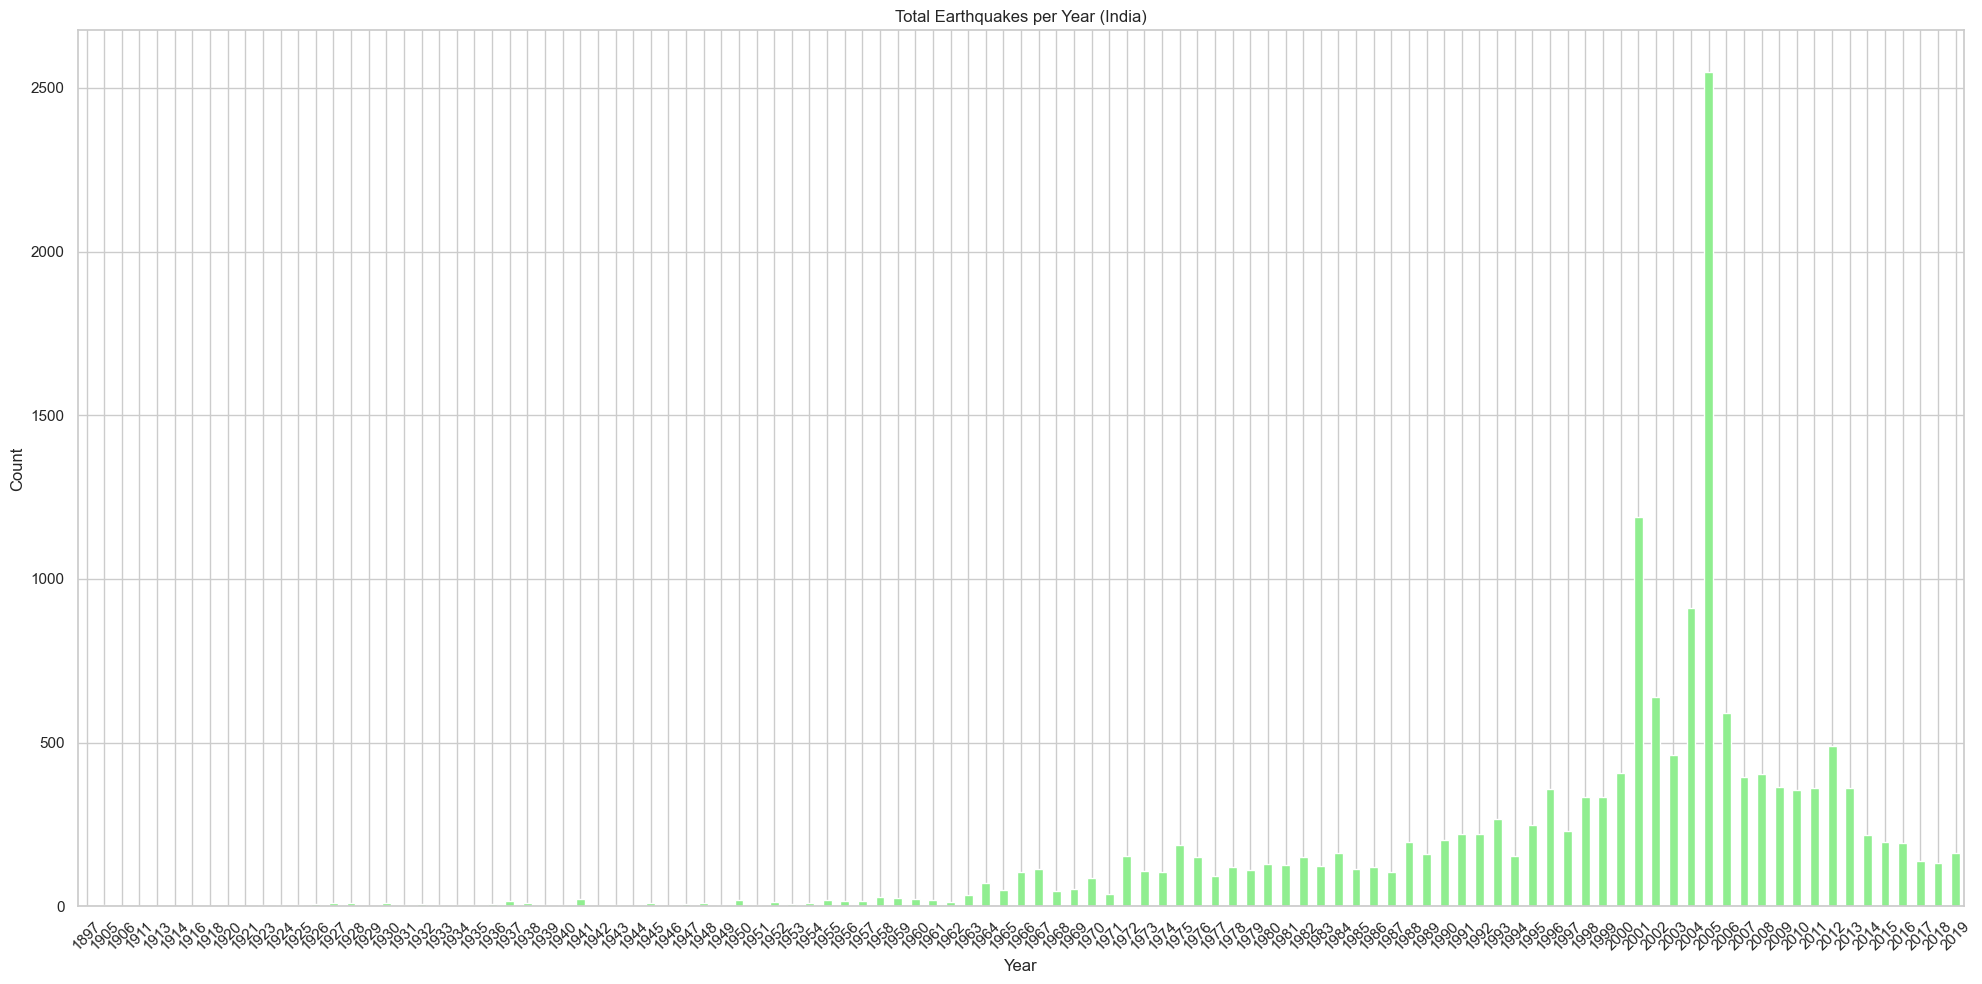

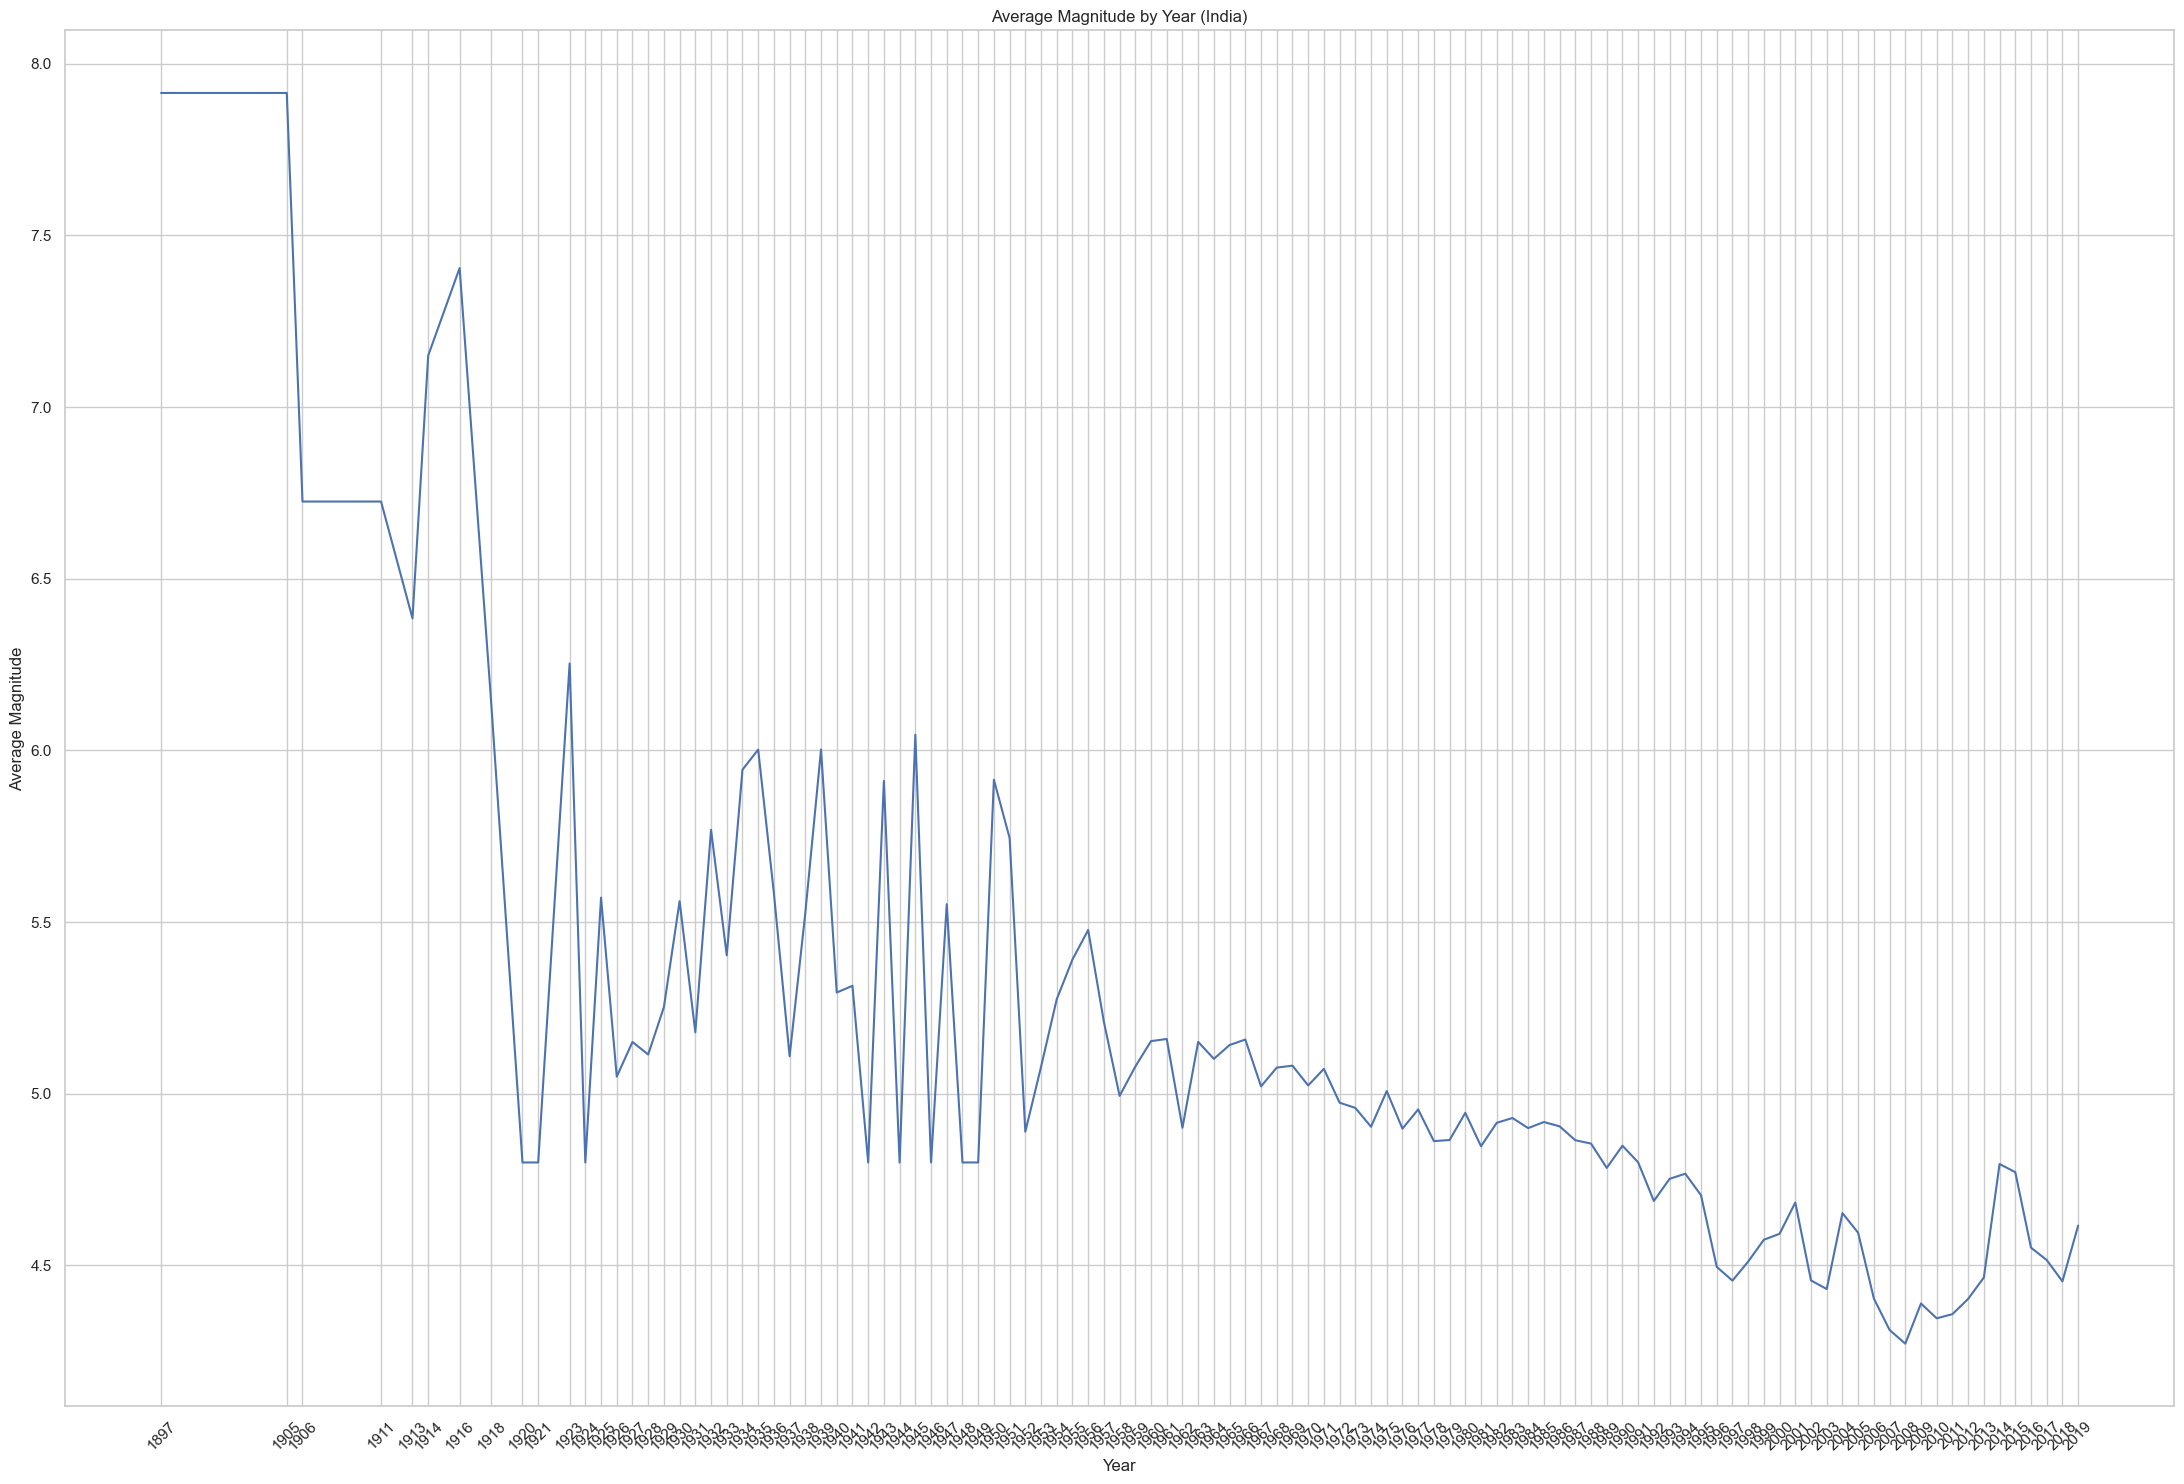

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Detect magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' and 'year' columns exist
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'year' not in df_india.columns:
        df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ 'time' column is missing. Cannot extract 'year'.")

# ✅ Plot 1: Total Earthquakes per Year
if 'year' in df_india.columns:
    yearly_counts = df_india.groupby('year').size()

    plt.figure(figsize=(20, 10))
    yearly_counts.plot(kind='bar', color='lightgreen')
    plt.title('Total Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'year' column is missing. Cannot plot total earthquakes per year.")

# ✅ Plot 2: Average Magnitude by Year
if 'year' in df_india.columns and mag_col:
    avg_mag_by_year = df_india.groupby('year')[mag_col].mean().reset_index()

    plt.figure(figsize=(22, 15))
    sns.lineplot(x='year', y=mag_col, data=avg_mag_by_year)
    plt.title('Average Magnitude by Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Average Magnitude')
    plt.xticks(avg_mag_by_year['year'], rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot average magnitude — missing either 'year' or valid magnitude column.")

✅ Descriptive Statistics for Selected Columns:
           DEPTH_KM            MW         MAGMB        HubDist  FaultDensity
count  16494.000000  16494.000000  16494.000000   16494.000000   2422.000000
mean      37.737401      4.640754      4.321838  106881.384731      4.285350
std       33.131730      0.443555      0.557117   89227.313196      3.949411
min        0.000000      3.200000      2.900000     368.678227      0.000004
25%       15.000000      4.345000      3.900000   42717.407100      0.850582
50%       33.000000      4.685000      4.300000   82103.783475      2.614245
75%       43.790000      4.800000      4.800000  144111.611575      7.966164
max      482.000000      8.680000      9.000000  551179.926000     13.100919
----------------------------------------
✅ Missing Values Count:
DEPTH_KM            0
MW                  0
MAGMB               0
HubDist             0
FaultDensity    14072
dtype: int64
----------------------------------------
✅ Distribution Plots:


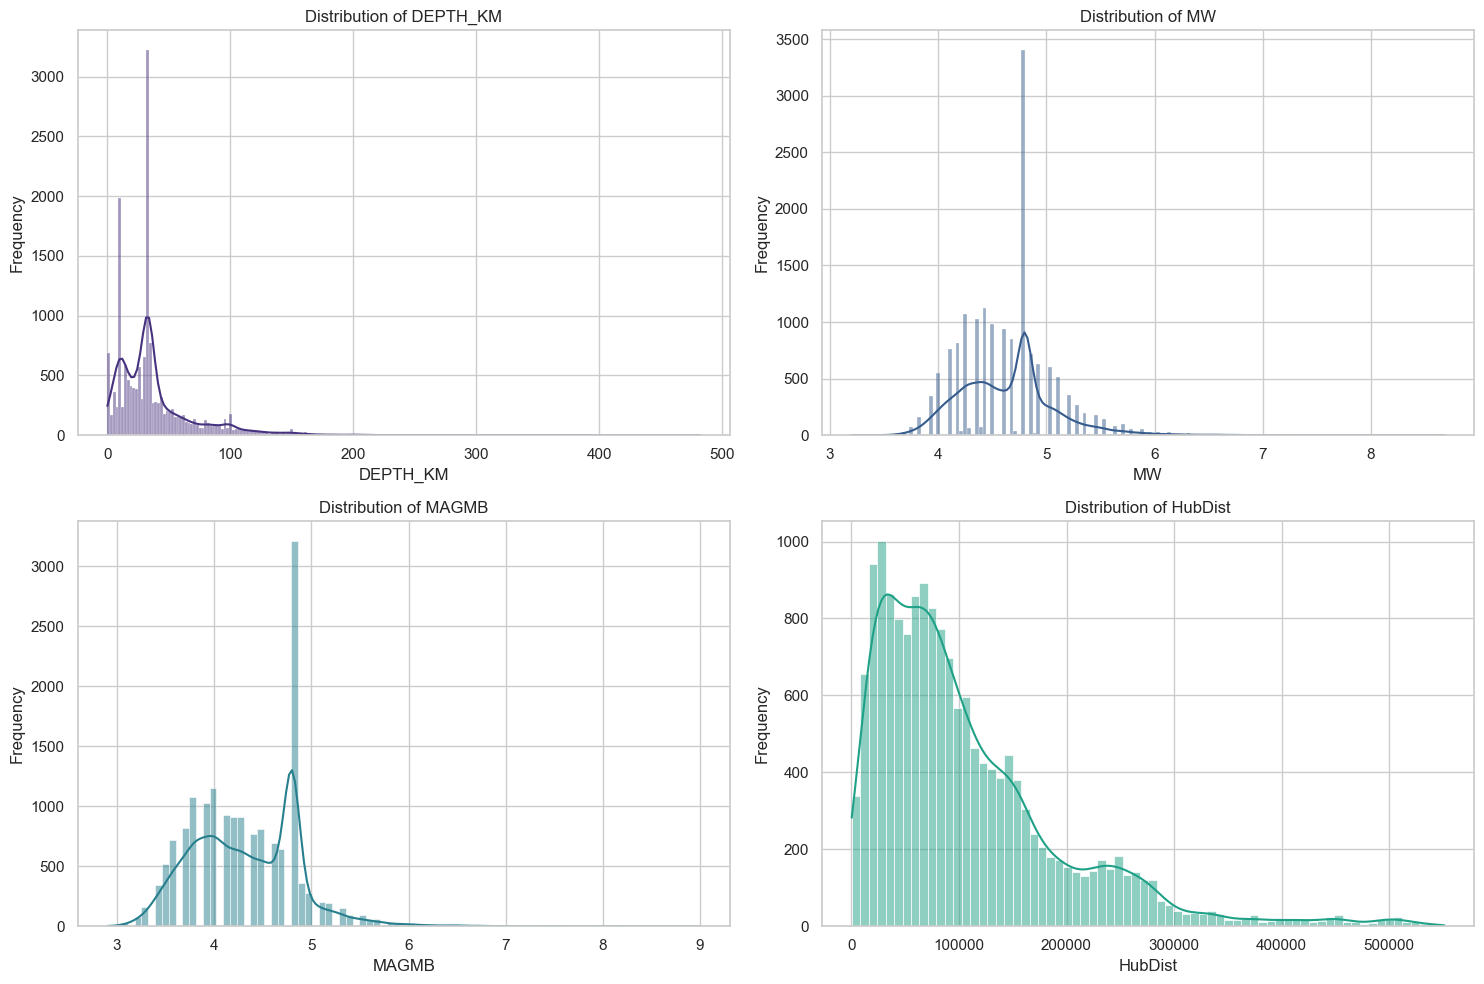

----------------------------------------
✅ Boxplots:


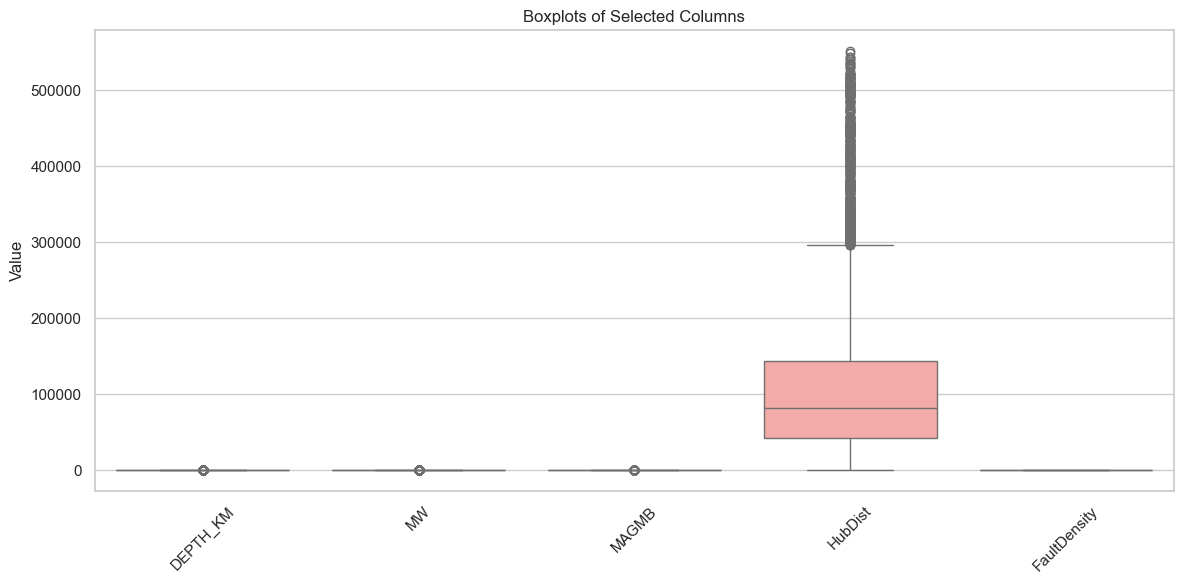

----------------------------------------
✅ Correlation Matrix:


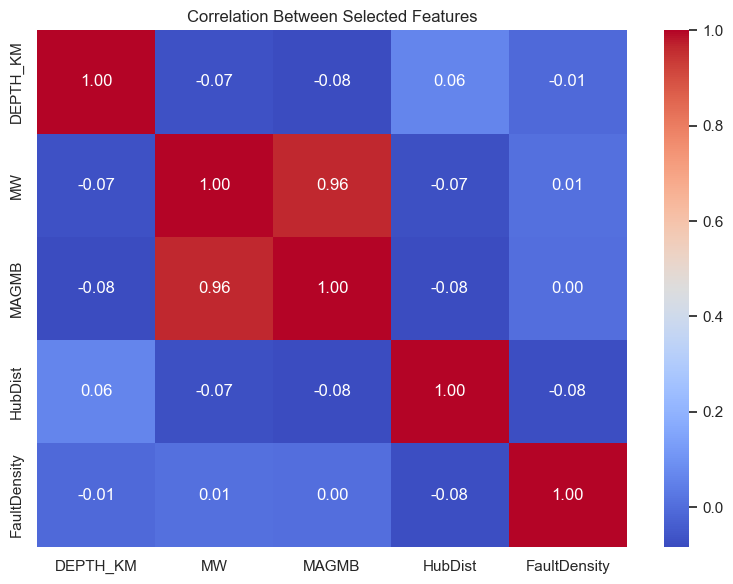

----------------------------------------
✅ Scatter Plots Against Magnitude:


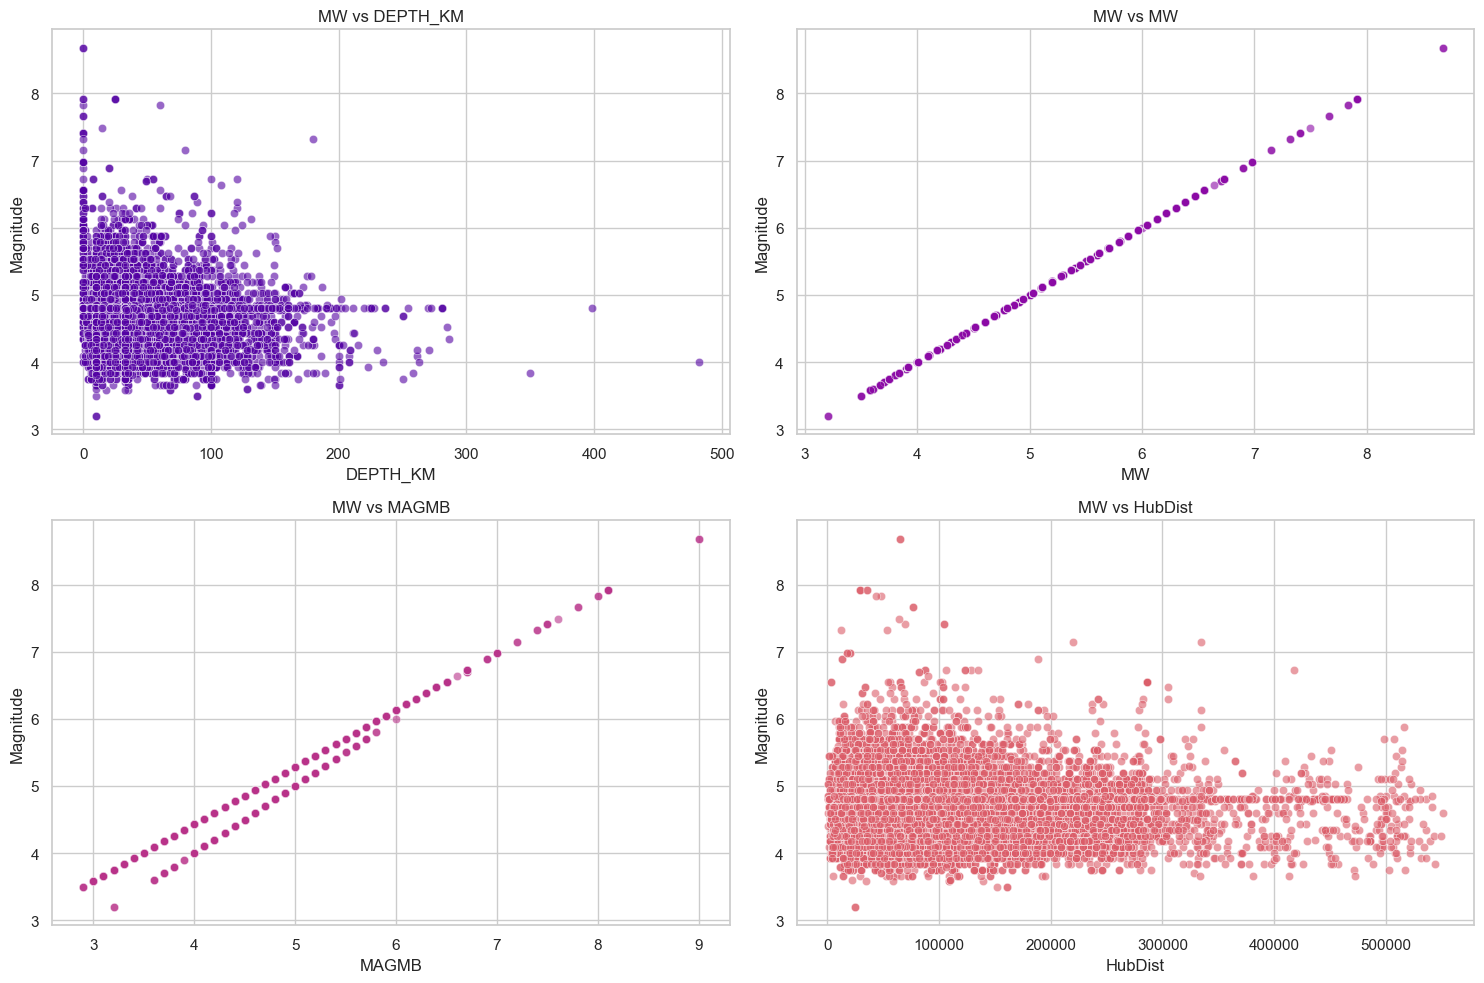

----------------------------------------
✅ Violin Plots by Risk Level:


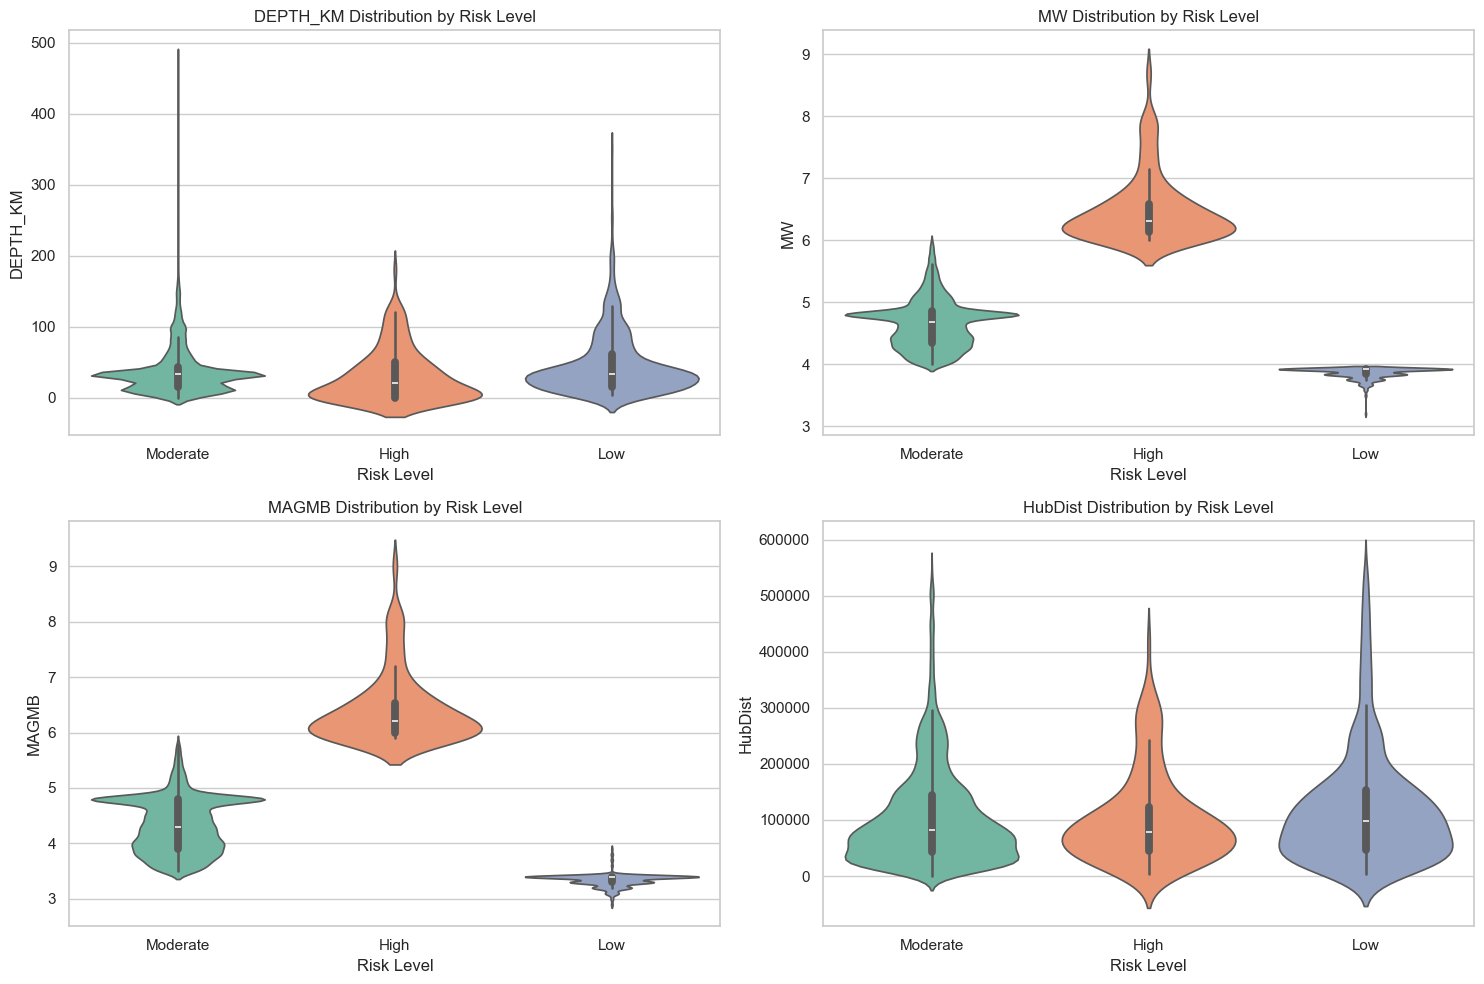

----------------------------------------


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Set style
sns.set(style="whitegrid")

# ✅ Define fallback columns
magnitude_cols = ['mag', 'MW', 'MAGMB']
global_analysis_cols = ['nst', 'gap', 'dmin', 'rms']
india_analysis_cols = ['DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Detect available magnitude column
mag_col = next((col for col in magnitude_cols if col in df_india.columns), None)

# ✅ Detect available analysis columns based on dataset
analysis_cols = [col for col in global_analysis_cols + india_analysis_cols if col in df_india.columns]

# ✅ Create 'risk_level' if not already present
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'
    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)

# ✅ Proceed only if we have at least 1 numeric analysis column
if analysis_cols:
    print("✅ Descriptive Statistics for Selected Columns:")
    print(df_india[analysis_cols].describe())
    print("-" * 40)

    print("✅ Missing Values Count:")
    print(df_india[analysis_cols].isnull().sum())
    print("-" * 40)

    # 📊 Distribution Plots
    print("✅ Distribution Plots:")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(analysis_cols[:4]):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df_india[col], kde=True, color=sns.color_palette('viridis')[i])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 📦 Boxplots
    print("✅ Boxplots:")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_india[analysis_cols], palette='pastel')
    plt.title('Boxplots of Selected Columns')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔗 Correlation Matrix
    print("✅ Correlation Matrix:")
    plt.figure(figsize=(8, 6))
    corr = df_india[analysis_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Features')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔁 Scatter Plots with Magnitude
    if mag_col:
        print("✅ Scatter Plots Against Magnitude:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.scatterplot(data=df_india, x=col, y=mag_col, alpha=0.6, color=sns.color_palette('plasma')[i])
            plt.title(f'{mag_col} vs {col}')
            plt.xlabel(col)
            plt.ylabel('Magnitude')
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ Magnitude column not found — skipping scatter plots.")

    # 🎻 Violin Plots by Risk Level
    if 'risk_level' in df_india.columns:
        print("✅ Violin Plots by Risk Level:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.violinplot(x='risk_level', y=col, data=df_india,
                           palette='Set2', hue='risk_level', legend=False)
            plt.title(f'{col} Distribution by Risk Level')
            plt.xlabel('Risk Level')
            plt.ylabel(col)
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ 'risk_level' not available — skipping violin plots.")

else:
    print("⚠️ No valid numeric analysis columns found in the dataset.")

In [77]:
# 🔁 All candidate columns (global + India-specific)
all_possible_cols = ['nst', 'gap', 'dmin', 'rms', 'DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Filter columns that exist in the dataset
columns_to_impute = [col for col in all_possible_cols if col in df_india.columns]

# ✅ Impute missing values using mean
for col in columns_to_impute:
    mean_val = df_india[col].mean()
    df_india[col] = df_india[col].fillna(mean_val)

# ✅ Show verification of imputation
print("✅ Missing values after mean imputation:")
print(df_india[columns_to_impute].isnull().sum())

✅ Missing values after mean imputation:
DEPTH_KM        0
MW              0
MAGMB           0
HubDist         0
FaultDensity    0
dtype: int64


In [78]:
df_india.isnull().sum()

X                  0
Y                  0
OBJECTID           0
SOURCE             3
YR                 0
MO                 0
DT                 0
HR                 0
MN                 0
SEC                0
LAT                0
LONG_              0
MAGMB              0
DEPTH_KM           0
MW                 0
HubName         6783
HubDist            0
FaultDensity       0
time               0
year_month         0
year               0
risk_level         0
month              0
dtype: int64

In [79]:
# Define possible NA-prone columns (global + India-specific)
global_na_cols = ['horizontalError', 'depthError', 'magError', 'magNst']
india_na_cols = ['HubDist', 'FaultDensity', 'MW', 'MAGMB']

# Combine and filter only columns that exist in the DataFrame
columns_to_handle_na = [col for col in (global_na_cols + india_na_cols) if col in df_india.columns]

# Impute missing values using median for each valid column
for col in columns_to_handle_na:
    if df_india[col].isnull().any():
        median_val = df_india[col].median()
        df_india[col] = df_india[col].fillna(median_val)
        print(f"✅ Imputed missing values in '{col}' with median: {median_val:.3f}")
    else:
        print(f"✔️ No missing values in '{col}'")

# Summary of missing values
print("\n✅ Missing values after imputation in key columns:")
print(df_india[columns_to_handle_na].isnull().sum())

print("\n🔍 Total missing values per column (entire DataFrame):")
print(df_india.isnull().sum()[df_india.isnull().sum() > 0])  # Only show columns with NA

✔️ No missing values in 'HubDist'
✔️ No missing values in 'FaultDensity'
✔️ No missing values in 'MW'
✔️ No missing values in 'MAGMB'

✅ Missing values after imputation in key columns:
HubDist         0
FaultDensity    0
MW              0
MAGMB           0
dtype: int64

🔍 Total missing values per column (entire DataFrame):
SOURCE        3
HubName    6783
dtype: int64


In [91]:
df_india.head(2)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,...,MW,HubName,HubDist,FaultDensity,time,year_month,year,risk_level,month,time_numeric
0,885385.2550,3047879.287,10403,ISC,1991,11,20,12,11,3,...,4.80,NaN,104658.11830,4.28535,1991-11-20 12:11:03,1991-11,1991,Moderate,11,690639063
1,867510.1211,3036551.478,38917,NEIC,2015,5,27,7,30,58,...,4.77,NaN,87938.60714,4.28535,2015-05-27 07:30:58,2015-05,2015,Moderate,5,1432711858


In [81]:
df_india['time_numeric'] = df_india['time'].astype('int64') // 10**9

In [82]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

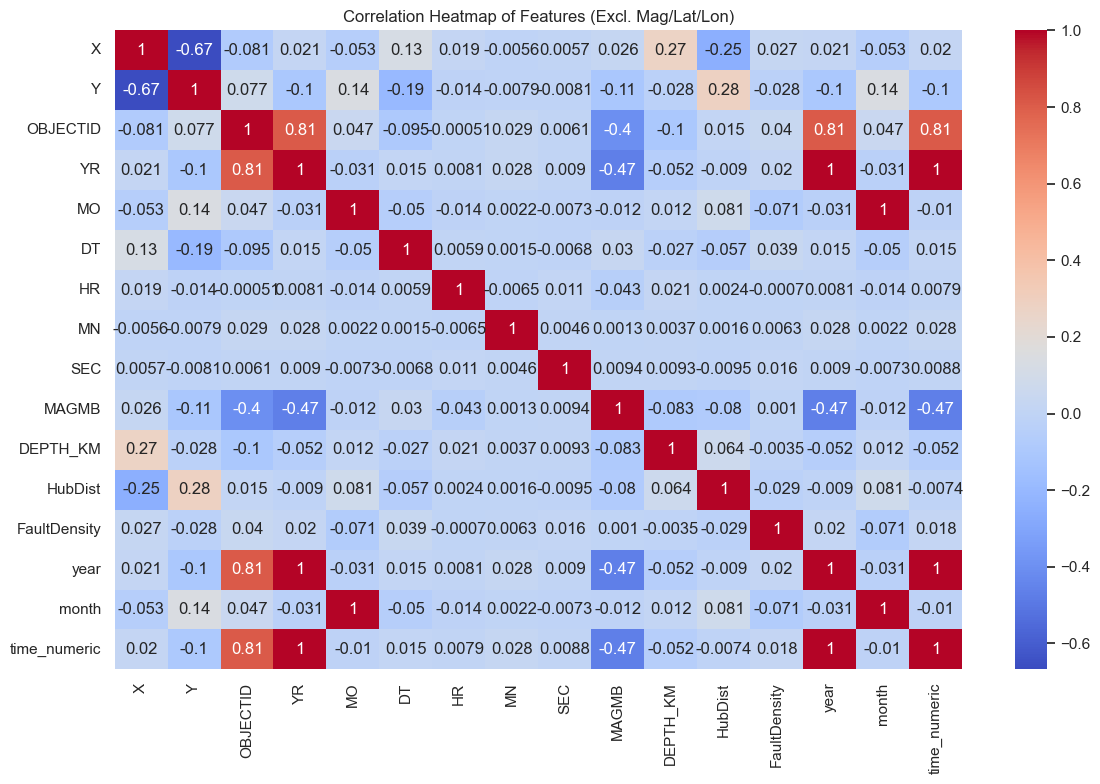


✅ Variance Inflation Factor (VIF) Table:
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471
2       OBJECTID   3.291825
1              Y   2.177541
0              X   2.104519
9          MAGMB   1.356937
10      DEPTH_KM   1.176027
11       HubDist   1.117465
5             DT   1.064039
12  FaultDensity   1.011400
6             HR   1.003090
7             MN   1.001606
8            SEC   1.001012

⚠️ Features with high multicollinearity (VIF > 5):
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# ✅ Define common magnitude and location columns
mag_cols = ['mag', 'MW', 'MAGMB']
lat_cols = ['latitude', 'LAT']
lon_cols = ['longitude', 'LONG_']

# ✅ Get actual column names in current dataset
mag_col = next((col for col in mag_cols if col in df_india.columns), None)
lat_col = next((col for col in lat_cols if col in df_india.columns), None)
lon_col = next((col for col in lon_cols if col in df_india.columns), None)

# ✅ Select only numeric columns
numeric_features = df_india.select_dtypes(include=[np.number])

# ✅ Drop target-like or spatial variables if they exist
drop_cols = [col for col in [lat_col, lon_col, mag_col] if col in numeric_features.columns]
numeric_features = numeric_features.drop(columns=drop_cols, errors='ignore')

# ✅ Drop columns with 0 variance or constant values
numeric_features = numeric_features.loc[:, numeric_features.nunique() > 1]

# ✅ Drop rows with NA for VIF safety
numeric_features = numeric_features.dropna()

# 🔍 Check if at least 2 columns remain
if numeric_features.shape[1] < 2:
    print("⚠️ Not enough valid numeric features for multicollinearity check.")
else:
    # === Correlation Heatmap ===
    corr_matrix = numeric_features.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Features (Excl. Mag/Lat/Lon)')
    plt.tight_layout()
    plt.show()

    # === VIF Calculation ===
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_features.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

    print("\n✅ Variance Inflation Factor (VIF) Table:")
    print(vif_data.sort_values(by='VIF', ascending=False))

    # Optional action
    high_vif = vif_data[vif_data["VIF"] > 5]
    if not high_vif.empty:
        print("\n⚠️ Features with high multicollinearity (VIF > 5):")
        print(high_vif)
    else:
        print("\n✅ No multicollinearity issues detected (VIF ≤ 5).")

In [84]:
# === Dimensionality Reduction / Regularization Based on VIF ===

# Assume `vif_data` has been computed as shown earlier
# Get features with VIF > 5
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Print them clearly
if high_vif:
    print("⚠️ High VIF features (multicollinearity suspected):")
    for feature in high_vif:
        print(f" - {feature} (VIF = {vif_data[vif_data['feature'] == feature]['VIF'].values[0]:.2f})")
else:
    print("✅ No high VIF features found (VIF ≤ 5)")

# Optional: Drop high-VIF features from dataset for further modeling
df_reduced = df_india.drop(columns=high_vif, errors='ignore')
print(f"\n✅ New shape after dropping high VIF features: {df_reduced.shape}")


⚠️ High VIF features (multicollinearity suspected):
 - YR (VIF = inf)
 - MO (VIF = inf)
 - year (VIF = inf)
 - month (VIF = inf)
 - time_numeric (VIF = 17.73)

✅ New shape after dropping high VIF features: (16494, 19)


In [85]:
# prompt: Features which have high VIF, perform to reduce multicollinearity like PCA or Lasso/Ridge regression whichever is applicable (Use any 1) since my task is to fit ML models like Linear Regression, SVR & Random Forest. Save the best model and predict latitude, longitude and magnitude using time as feature input for each ML Model and store it in a dataframe. (Input should be real time i.e. current date and time)

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import joblib
from datetime import datetime
import pytz  # Only needed if using pytz, otherwise see zoneinfo option below

# Set current time to IST

# Assuming the high_vif list contains columns that need reduction.
# If high_vif is empty, skip this step or choose a method regardless.

# Option 1: PCA (Applicable if high VIF features are highly correlated among themselves)
# Identify numerical columns excluding targets
numeric_cols = df_india.select_dtypes(include=np.number).columns.tolist()
# Dynamically detect target columns
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)

target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
print(f"✅ Using target columns: {target_cols}")

features_to_reduce = [col for col in numeric_cols if col in high_vif and col not in target_cols] # Ensure high VIF features are numerical and not targets

if features_to_reduce:
    print(f"\nApplying PCA on high VIF features: {features_to_reduce}")
    pca = PCA(n_components=0.95) # Retain 95% variance
    # Scale data before PCA
    scaler_pca = StandardScaler()
    # Fit scaler on the features to be reduced
    scaler_pca.fit(df_india[features_to_reduce])
    scaled_features_pca = scaler_pca.transform(df_india[features_to_reduce])
    principal_components = pca.fit_transform(scaled_features_pca)

    # Create new PCA features dataframe
    pca_df = pd.DataFrame(data=principal_components,
                          columns=[f'principal_component_{i+1}' for i in range(principal_components.shape[1])],
                          index=df_india.index)

    # Drop original high VIF features and add PCA features
    df_india_pca = df_india.drop(columns=features_to_reduce).join(pca_df)
    print("\nDataFrame after PCA:")
    print(df_india_pca.head())
    df_processed = df_india_pca.copy()
    feature_cols = pca_df.columns.tolist() # Use PCA components as features
else:
    print("\nNo high VIF numerical features identified. Using original dataframe for modeling.")
    df_processed = df_india.copy()
    feature_cols = ['time_numeric'] # Use time_numeric as the feature if no PCA


# Drop rows with NaN values in feature or target columns in the processed dataframe
df_processed.dropna(subset=feature_cols + target_cols, inplace=True)


X = df_processed[feature_cols]
y = df_processed[target_cols]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variables separately for SVR (as it's a multi-output regression)
# Linear Regression and Random Forest can handle multiple outputs directly.
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
# y_test_scaled is not strictly needed for evaluation if using inverse_transform later

# Dictionary to store models
models = {}
best_models = {}
model_predictions = {}

# --- Linear Regression ---
print("\nTraining Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train) # Use original y for multi-output

# Save the model
best_models['Linear Regression'] = lr_model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# --- SVR (Support Vector Regressor) ---
# SVR is typically a single-output model. For multi-output, we train one SVR per target.
print("\nTraining SVR Models...")
svr_models = {}
svr_predictions_test = pd.DataFrame(index=X_test.index)

# Define parameter grid for SVR
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}

for i, target_col in enumerate(target_cols):
    print(f"  Training SVR for {target_col}...")
    svr = SVR()
    # Use scaled target variable for SVR training
    y_train_single_scaled = y_train_scaled[:, i].reshape(-1, 1)

    # RandomizedSearchCV for SVR
    random_search_svr = RandomizedSearchCV(svr, param_grid_svr, cv=3, n_iter=10, random_state=42, n_jobs=-1)
    random_search_svr.fit(X_train_scaled, y_train_single_scaled.ravel())

    best_svr = random_search_svr.best_estimator_
    svr_models[target_col] = best_svr

    # Save the model
    joblib.dump(best_svr, f'svr_model_{target_col}.pkl')
    best_models[f'SVR_{target_col}'] = best_svr

# --- Random Forest Regressor ---
print("\nTraining Random Forest Regressor Model...")
rf_model = RandomForestRegressor(random_state=42)

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, cv=3, n_iter=10, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_scaled, y_train) # Use original y for multi-output

best_rf = random_search_rf.best_estimator_

# Save the model
best_models['Random Forest'] = best_rf
joblib.dump(best_rf, 'random_forest_model.pkl')


# --- Evaluation on Test Set ---
print("\nEvaluating Models on Test Data...")

evaluation_results = {}

# Linear Regression
lr_preds_test = best_models['Linear Regression'].predict(X_test_scaled)
evaluation_results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, lr_preds_test),
    'R2': r2_score(y_test, lr_preds_test)
}
print(f"Linear Regression - MSE: {evaluation_results['Linear Regression']['MSE']:.4f}, R2: {evaluation_results['Linear Regression']['R2']:.4f}")

# SVR
svr_predictions_test = pd.DataFrame(index=X_test.index)
for target_col in target_cols:
    svr_model = best_models[f'SVR_{target_col}']
    svr_pred_scaled_test = svr_model.predict(X_test_scaled).reshape(-1, 1)
    # Inverse transform predictions to original scale
    # Need a dummy array with the correct shape for inverse_transform
    dummy_array = np.tile(y_train_scaled[0], (len(svr_pred_scaled_test), 1)) # Use a row from scaled training data to get shape
    col_index = target_cols.index(target_col)
    dummy_array[:, col_index] = svr_pred_scaled_test.ravel() # Place scaled prediction into correct column
    svr_pred_original_test = scaler_y.inverse_transform(dummy_array)
    svr_predictions_test[target_col] = svr_pred_original_test[:, col_index] # Extract and assign the column


# Align the SVR predictions with y_test index
svr_predictions_test = svr_predictions_test.reindex(y_test.index)

evaluation_results['SVR'] = {
    'MSE': mean_squared_error(y_test, svr_predictions_test),
    'R2': r2_score(y_test, svr_predictions_test)
}
print(f"SVR - MSE: {evaluation_results['SVR']['MSE']:.4f}, R2: {evaluation_results['SVR']['R2']:.4f}")


# Random Forest
rf_preds_test = best_models['Random Forest'].predict(X_test_scaled)
evaluation_results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, rf_preds_test),
    'R2': r2_score(y_test, rf_preds_test)
}
print(f"Random Forest - MSE: {evaluation_results['Random Forest']['MSE']:.4f}, R2: {evaluation_results['Random Forest']['R2']:.4f}")

print("\nEvaluation Results:")
print(pd.DataFrame(evaluation_results).T)

# --- Real-time Prediction ---
print("\nPerforming Real-time Prediction...")

# Get current time and convert to numeric
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

# Prepare the input for prediction based on whether PCA was applied
if features_to_reduce:
    # Create a DataFrame with the same columns as features_to_reduce and populate time_numeric
    real_time_input_df = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        real_time_input_df['time_numeric'] = current_time_numeric
    # Note: Other columns in features_to_reduce are not available for a single real-time prediction.
    # A more sophisticated approach would be needed for models that rely on these features.
    # For this specific request focusing on time as input, we proceed with time_numeric.

    # Scale the real-time input using the fitted scaler_pca
    scaled_real_time_input = scaler_pca.transform(real_time_input_df)

    # Transform the scaled features using the fitted PCA model
    current_time_scaled = pca.transform(scaled_real_time_input)

else:
    # If PCA was not applied, scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    current_time_scaled = scaler_X.transform([[current_time_numeric]])


# Store predictions in a DataFrame
real_time_predictions_df = pd.DataFrame(index=[current_time])

# Linear Regression Prediction
lr_pred_rt = best_models['Linear Regression'].predict(current_time_scaled)
real_time_predictions_df.loc[current_time, [f'LR_{col}' for col in target_cols]] = lr_pred_rt[0]

# SVR Prediction (one per target)
svr_pred_rt = []
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    svr_pred_scaled_rt = svr_model.predict(current_time_scaled).reshape(-1, 1)
    # Inverse transform the single prediction
    # Need a dummy array with the correct shape for inverse_transform
    dummy_array = np.tile(y_train_scaled[0], (1, 1)) # Use a row from scaled training data to get shape
    dummy_array[0, i] = svr_pred_scaled_rt # Place the scaled prediction in the correct column
    svr_pred_original_rt = scaler_y.inverse_transform(dummy_array)
    real_time_predictions_df.loc[current_time, f'SVR_{target_col}'] = svr_pred_original_rt[0, i]

# Random Forest Prediction
rf_pred_rt = best_models['Random Forest'].predict(current_time_scaled)
real_time_predictions_df.loc[current_time, [f'RF_{col}' for col in target_cols]] = rf_pred_rt[0]


print("\nReal-time Predictions:")
display(real_time_predictions_df)

# Save the real-time predictions to a CSV file
real_time_predictions_df.to_csv('real_time_earthquake_predictions.csv')
print("\nReal-time predictions saved to 'real_time_earthquake_predictions.csv'")

✅ Using target columns: ['LAT', 'LONG_', 'MAGMB']

Applying PCA on high VIF features: ['YR', 'MO', 'year', 'month', 'time_numeric']

DataFrame after PCA:
             X            Y  OBJECTID SOURCE  DT  HR  MN  SEC      LAT  \
0  885385.2550  3047879.287     10403    ISC  20  12  11    3  27.5000   
1  867510.1211  3036551.478     38917   NEIC  27   7  30   58  27.4029   
2  862566.0542  3027824.935     38916   NEIC  27   7  30   41  27.3256   
3  826054.0393  3046155.615     19677    ISC   8   0  18    4  27.5000   
4  902796.9484  3026552.425     38913   NEIC  26  14  15   30  27.3029   

       LONG_  ...  DEPTH_KM     MW  HubName       HubDist  FaultDensity  \
0  84.900002  ...      69.0  4.800      NaN  104658.11830       4.28535   
1  84.716000  ...      10.0  4.770      NaN   87938.60714       4.28535   
2  84.663500  ...      10.0  4.430      NaN   78239.09747       4.28535   
3  84.300003  ...      33.0  4.600      NaN   95748.16790       4.28535   
4  85.068800  ...      10.

,LR_LAT,LR_LONG_,LR_MAGMB,SVR_LAT,SVR_LONG_,SVR_MAGMB,RF_LAT,RF_LONG_,RF_MAGMB
2025-07-05 20:00:22.026318+05:30,169.155038,62.861557,45.319564,10.235894,108.911468,4.806409,24.007704,89.647615,5.83591



Real-time predictions saved to 'real_time_earthquake_predictions.csv'


In [86]:
# prompt: Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# Use the scaled test data (X_test_scaled) for making predictions
lr_preds_test = best_models['Linear Regression'].predict(X_test_scaled)

# SVR predictions on test set (already calculated in the previous step)
# svr_predictions_test dataframe contains these

rf_preds_test = best_models['Random Forest'].predict(X_test_scaled)

# Create a DataFrame to display the test data (time feature) and predictions
# Since 'time_numeric' was used as a feature (potentially transformed by PCA),
# we need to access the original 'time' values from the test set index
test_data_predictions = pd.DataFrame(index=X_test.index)

# Add the original time values from the test set index
test_data_predictions['Original_Time'] = df_india.loc[X_test.index, 'time']

# Add the scaled time feature from the test set if 'time_numeric' was the only feature
# Or if PCA was applied, X_test_scaled contains the transformed features including the time information
# For simplicity, let's show the scaled feature columns used for prediction
for i, col in enumerate(feature_cols):
    test_data_predictions[f'Scaled_{col}'] = X_test_scaled[:, i]


# Add the predictions for each model and target variable
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'Actual_{target_col}'] = y_test[target_col]
    test_data_predictions[f'LR_Predicted_{target_col}'] = lr_preds_test[:, i]
    test_data_predictions[f'SVR_Predicted_{target_col}'] = svr_predictions_test[target_col]
    test_data_predictions[f'RF_Predicted_{target_col}'] = rf_preds_test[:, i]

print("\nTest Data (Time Feature) and Predictions:")
display(test_data_predictions.head())

# Optional: Save the test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions.csv')
print("\nTest data and predictions saved to 'test_data_predictions.csv'")


Test Data (Time Feature) and Predictions:


,Original_Time,Scaled_principal_component_1,Scaled_principal_component_2,Actual_LAT,LR_Predicted_LAT,SVR_Predicted_LAT,RF_Predicted_LAT,Actual_LONG_,LR_Predicted_LONG_,SVR_Predicted_LONG_,RF_Predicted_LONG_,Actual_MAGMB,LR_Predicted_MAGMB,SVR_Predicted_MAGMB,RF_Predicted_MAGMB
3016,2005-01-27 21:00:41,0.531334,-1.357965,9.710300,22.158155,8.920315,7.967235,93.541300,85.088435,93.127861,94.082001,5.0,4.215141,4.254645,4.427259
9913,2014-11-17 01:25:28,1.034859,1.340155,29.465300,25.114028,28.751545,27.204435,70.116300,83.640845,88.546925,84.208009,4.4,4.016042,4.169787,4.349784
11910,1972-10-12 01:10:32,-1.819635,0.867138,35.759998,27.399544,34.394329,34.895442,72.980003,83.412062,74.439982,73.742584,4.8,4.774857,4.799117,4.920235
6974,1998-02-12 02:40:27,0.041875,-1.127288,26.600000,22.950596,28.672960,24.878602,87.910004,84.871777,72.478908,82.119194,4.2,4.337475,4.665012,4.157936
15398,1970-07-28 15:45:25,-1.922194,0.061232,23.100000,26.468162,30.924278,27.702308,69.300003,83.852791,83.233720,87.859709,4.8,4.821807,4.834454,5.011679



Test data and predictions saved to 'test_data_predictions.csv'


In [87]:
# prompt: Make some future predictions by giving some random future time inputs (timestamp) (autogenerative for 100 years) and display it in a data frame based on above model and show few rows

# Generate future timestamps
future_years = 100
# Start from the latest time in the dataset or current time
if not df_india['time'].empty:
    start_time = df_india['time'].max()
else:
    start_time = datetime.now(pytz.timezone('Asia/Kolkata'))

# Generate timestamps covering approximately the next 100 years
# Creating 365*100 timestamps for roughly daily predictions
future_timestamps = pd.date_range(start=start_time + pd.Timedelta(days=1),
                                 periods=365 * future_years,
                                 freq='D').tolist() # 'D' for daily frequency

# Convert future timestamps to numeric format
future_time_numeric = [(timestamp.timestamp() if pd.notnull(timestamp) else np.nan) for timestamp in future_timestamps]

# Prepare the input DataFrame for future predictions
if features_to_reduce:
    # Create a DataFrame with the same columns as features_to_reduce and populate time_numeric
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)
    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        future_input_df['time_numeric'] = future_time_numeric
    # For other features that were part of PCA but are not time, we use their median or mean from the training data
    # This is a simplification; a more robust approach would consider trends or cycles in these features.
    for col in features_to_reduce:
        if col != 'time_numeric':
             # Use the median/mean from the original df_india before splitting, ensuring alignment with scaler
             # Or use the mean/median from the training set X_train if that's more appropriate for your scaling strategy
            if col in df_india.columns:
                future_input_df[col] = df_india[col].median() # Using median from full data
            else:
                 # If the feature was created during preprocessing and is not in original df_india,
                 # use a representative value (e.g., 0 or mean/median from X_train before scaling)
                print(f"Warning: Feature '{col}' not found in original df_india. Filling with 0 for prediction input.")
                future_input_df[col] = 0.0


    # Scale the future input using the fitted scaler_pca
    scaled_future_input = scaler_pca.transform(future_input_df)

    # Transform the scaled features using the fitted PCA model
    future_X_scaled = pca.transform(scaled_future_input)

else:
    # If PCA was not applied, scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    future_X = pd.DataFrame({'time_numeric': future_time_numeric})
    future_X_scaled = scaler_X.transform(future_X)


# Create a DataFrame to store future predictions
future_predictions_df = pd.DataFrame(index=future_timestamps)

# Linear Regression Future Prediction
lr_future_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{target_col}'] = lr_future_preds[:, i]

# SVR Future Prediction (one per target)
svr_future_preds = pd.DataFrame(index=future_timestamps)
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    svr_pred_scaled_future = svr_model.predict(future_X_scaled).reshape(-1, 1)

    # Inverse transform predictions to original scale
    # Need a dummy array with the correct shape for inverse_transform
    dummy_array = np.tile(y_train_scaled[0], (len(svr_pred_scaled_future), 1)) # Use a row from scaled training data to get shape
    col_index = target_cols.index(target_col)
    dummy_array[:, col_index] = svr_pred_scaled_future.ravel() # Place scaled prediction into correct column
    svr_pred_original_future = scaler_y.inverse_transform(dummy_array)
    future_predictions_df[f'SVR_Predicted_{target_col}'] = svr_pred_original_future[:, col_index] # Extract and assign the column

# Random Forest Future Prediction
rf_future_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{target_col}'] = rf_future_preds[:, i]


print("\nFuture Predictions (showing a few rows):")
display(future_predictions_df.head())
display(future_predictions_df.tail())

# Optional: Save the future predictions to a CSV file
future_predictions_df.to_csv('future_earthquake_predictions.csv')
print("\nFuture predictions saved to 'future_earthquake_predictions.csv'")



Future Predictions (showing a few rows):


,LR_Predicted_LAT,LR_Predicted_LONG_,LR_Predicted_MAGMB,SVR_Predicted_LAT,SVR_Predicted_LONG_,SVR_Predicted_MAGMB,RF_Predicted_LAT,RF_Predicted_LONG_,RF_Predicted_MAGMB
2019-12-31 19:20:16,23.174723,84.443013,3.995406,27.563571,84.943873,4.346192,27.882184,83.908075,4.314747
2020-01-01 19:20:16,23.174625,84.443027,3.995378,27.562151,84.942672,4.346329,27.882184,83.908075,4.314747
2020-01-02 19:20:16,23.174526,84.443041,3.995349,27.560730,84.941471,4.346466,27.882184,83.908075,4.314747
2020-01-03 19:20:16,23.174428,84.443055,3.995321,27.559309,84.940271,4.346602,27.882184,83.908075,4.314747
2020-01-04 19:20:16,23.174330,84.443069,3.995293,27.557886,84.939072,4.346739,27.882184,83.908075,4.314747


,LR_Predicted_LAT,LR_Predicted_LONG_,LR_Predicted_MAGMB,SVR_Predicted_LAT,SVR_Predicted_LONG_,SVR_Predicted_MAGMB,RF_Predicted_LAT,RF_Predicted_LONG_,RF_Predicted_MAGMB
2119-12-02 19:20:16,19.587775,84.955687,2.961959,10.667258,110.665491,4.563569,23.859655,87.693962,4.524785
2119-12-03 19:20:16,19.587677,84.955701,2.961930,10.667107,110.664843,4.563653,23.859655,87.693962,4.524785
2119-12-04 19:20:16,19.587578,84.955715,2.961902,10.666956,110.664195,4.563737,23.859655,87.693962,4.524785
2119-12-05 19:20:16,19.587480,84.955729,2.961874,10.666804,110.663548,4.563821,23.859655,87.693962,4.524785
2119-12-06 19:20:16,19.587382,84.955743,2.961845,10.666653,110.662900,4.563905,23.859655,87.693962,4.524785



Future predictions saved to 'future_earthquake_predictions.csv'


In [88]:
# prompt: For Multi-layered Perceptron, predict latitude, longitude & magnitude from the best model saved. Use today's date and time as input for real time prediction. (Use Early Stopping, Model Checkpoint, learning rate scheduler (if else use), dropout, add dense layers more) (keep verbose as 1) (use mae as metric) (Don't compare with previous ML models) (Don't use reduceLRonplateau)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
import pandas as pd # Import pandas
from datetime import datetime
import pytz # Import pytz

# Define input and output shapes
input_shape = X_train_scaled.shape[1]
output_shape = y_train_scaled.shape[1]

# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape) # Output layer with no activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_mlp_model.keras', monitor='val_mae', save_best_only=True, verbose=1)

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1)) # Convert to float

lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

callbacks_list = [early_stopping, model_checkpoint, lr_schedule]

# Train the model
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=callbacks_list,
                    verbose=1)

# Load the best saved model
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')

print("\nPerforming Real-time Prediction using MLP...")

# Get current time and convert to numeric
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

# Prepare the input for prediction based on whether PCA was applied
if features_to_reduce:
    # Create a dummy dataframe with all features_to_reduce for scaling
    real_time_input_df = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        real_time_input_df['time_numeric'] = current_time_numeric

    # Scale the real-time input using the fitted scaler_pca
    scaled_real_time_input = scaler_pca.transform(real_time_input_df)

    # Transform the scaled features using the fitted PCA model
    current_time_scaled = pca.transform(scaled_real_time_input)

else:
    # If PCA was not applied, just scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    current_time_scaled = scaler_X.transform([[current_time_numeric]])


# Make prediction using the best MLP model
mlp_pred_scaled_rt = best_mlp_model.predict(current_time_scaled)

# Inverse transform the scaled prediction to original scale
mlp_pred_original_rt = scaler_y.inverse_transform(mlp_pred_scaled_rt)

# Store prediction in a DataFrame
real_time_predictions_mlp_df = pd.DataFrame(
    data=[mlp_pred_original_rt[0]],
    columns=[f'MLP_{col}' for col in target_cols],
    index=[current_time]
)

print("\nReal-time Predictions (MLP):")
display(real_time_predictions_mlp_df)

# Optional: Save MLP predictions to a CSV file
real_time_predictions_mlp_df.to_csv('real_time_earthquake_predictions_mlp.csv')
print("\nReal-time MLP predictions saved to 'real_time_earthquake_predictions_mlp.csv'")

ImportError: Traceback (most recent call last):
  File "C:\Users\Supravo Biswas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
# prompt: Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# MLP Predictions on Test Set
mlp_preds_scaled_test = best_mlp_model.predict(X_test_scaled)
mlp_preds_original_test = scaler_y.inverse_transform(mlp_preds_scaled_test)

# Add MLP predictions to the test_data_predictions DataFrame
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'MLP_Predicted_{target_col}'] = mlp_preds_original_test[:, i]

print("\nTest Data (Time Feature) and Predictions (including MLP):")
display(test_data_predictions.head())

# Optional: Save the updated test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions_with_mlp.csv')
print("\nUpdated test data and predictions saved to 'test_data_predictions_with_mlp.csv'")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Test Data (Time Feature) and Predictions (including MLP):


,Original_Time,Scaled_principal_component_1,Scaled_principal_component_2,Actual_LAT,LR_Predicted_LAT,SVR_Predicted_LAT,RF_Predicted_LAT,Actual_LONG_,LR_Predicted_LONG_,SVR_Predicted_LONG_,RF_Predicted_LONG_,Actual_MAGMB,LR_Predicted_MAGMB,SVR_Predicted_MAGMB,RF_Predicted_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB
4931,2008-09-04 06:46:47,0.556568,0.880704,9.958300,19.426660,24.261520,21.835486,93.080200,90.034273,92.938367,89.368668,3.7,4.177134,3.937955,4.020153,21.955425,89.703949,3.980970
7773,1991-06-10 21:30:11,-0.419138,-0.100817,29.350000,20.398660,25.727749,23.235788,80.220001,89.513466,92.949221,89.195299,4.5,4.467295,4.529155,4.576437,22.859451,88.797462,4.495652
1027,1998-10-17 09:24:43,-0.099848,1.022009,32.419998,20.596577,24.467222,21.342631,76.529999,89.503876,92.276993,90.085157,4.3,4.345565,4.170467,4.261972,22.129185,88.391266,4.255114
3721,2012-05-02 09:57:29,0.927301,-0.111453,8.842800,18.178647,25.289723,21.189174,93.893200,90.538716,92.948599,90.630803,4.6,4.112482,4.005921,4.096481,21.452061,90.310944,4.085572
33,1936-02-11 04:48:00,-3.747970,-1.793522,27.500000,24.780762,26.405985,24.845371,87.000000,87.364746,89.557307,90.734646,5.5,5.401925,5.614889,5.432923,24.140356,89.541626,5.198116



Updated test data and predictions saved to 'test_data_predictions_with_mlp.csv'


In [ ]:
# prompt: Make some future predictions by giving some random future time stamps as input (Auto generative for 100 years) and display it in a data frame

# Generate future timestamps for 100 years, roughly daily
future_years = 100
# Start from the latest time in the dataset if available, otherwise from current time
if not df_india['time'].empty:
    start_time = df_india['time'].max()
else:
    start_time = datetime.now(pytz.timezone('Asia/Kolkata'))

# Generate timestamps covering approximately the next 100 years
# Creating 365 * future_years timestamps for daily predictions
future_timestamps = pd.date_range(start=start_time + pd.Timedelta(days=1),
                                 periods=365 * future_years,
                                 freq='D').tolist() # 'D' for daily frequency

# Convert future timestamps to numeric format
# Ensure valid timestamps are converted, handle potential NaT if any slipped through
future_time_numeric = [(timestamp.timestamp() if pd.notnull(timestamp) else np.nan) for timestamp in future_timestamps]

# Prepare the input DataFrame for future predictions
if features_to_reduce:
    # Create a DataFrame with the same columns as features_to_reduce
    # Initialize with zeros or a representative value
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)

    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        future_input_df['time_numeric'] = future_time_numeric

    # For other features that were part of PCA but are not time, use a representative value (e.g., median/mean)
    # from the training data to maintain consistency with scaling.
    # A simple approach is to use the mean/median from the original data before splitting,
    # but using the mean/median from X_train before scaling is generally more appropriate
    # as scaler_pca was fitted on X_train[features_to_reduce].
    # Let's assume X_train_unscaled (before scaler_X) exists for this purpose.
    # Since we don't have X_train_unscaled explicitly saved, we will use the median
    # from the original df_india for simplicity here, but note this might not be ideal
    # if the distribution significantly changed after splitting.
    for col in features_to_reduce:
        if col != 'time_numeric':
            if col in df_india.columns:
                 # Use median from the original data as a stand-in
                future_input_df[col] = df_india[col].median()
            else:
                print(f"Warning: Feature '{col}' not found in original df_india. Filling with 0 for prediction input.")
                future_input_df[col] = 0.0


    # Scale the future input using the fitted scaler_pca
    # Check for and handle potential NaNs before scaling
    if future_input_df.isnull().values.any():
        print("Warning: NaN values found in future_input_df before scaling. Imputing with median.")
        # Impute NaNs if any were introduced (e.g., from NaN in future_time_numeric)
        for col in future_input_df.columns:
            if future_input_df[col].isnull().any():
                future_input_df[col] = future_input_df[col].fillna(future_input_df[col].median())


    scaled_future_input = scaler_pca.transform(future_input_df)

    # Transform the scaled features using the fitted PCA model
    future_X_scaled = pca.transform(scaled_future_input)

else:
    # If PCA was not applied, scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    future_X = pd.DataFrame({'time_numeric': future_time_numeric})
    # Ensure no NaNs in the future_X dataframe before scaling
    if future_X.isnull().values.any():
        print("Warning: NaN values found in future_X before scaling. Imputing with median.")
        for col in future_X.columns:
            if future_X[col].isnull().any():
                future_X[col] = future_X[col].fillna(future_X[col].median())

    future_X_scaled = scaler_X.transform(future_X)


# Create a DataFrame to store future predictions
future_predictions_df = pd.DataFrame(index=future_timestamps)

# --- Generate predictions using each model ---

# Linear Regression Future Prediction
print("\nGenerating Linear Regression future predictions...")
lr_future_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{target_col}'] = lr_future_preds[:, i]

# SVR Future Prediction (one per target)
print("Generating SVR future predictions...")
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    svr_pred_scaled_future = svr_model.predict(future_X_scaled).reshape(-1, 1)

    # Inverse transform predictions to original scale
    # Need a dummy array with the correct shape for inverse_transform
    # Use a row from scaled training data (y_train_scaled) to get shape
    dummy_array = np.tile(y_train_scaled[0], (len(svr_pred_scaled_future), 1))
    col_index = target_cols.index(target_col)
    # Place scaled prediction into correct column
    dummy_array[:, col_index] = svr_pred_scaled_future.ravel()
    svr_pred_original_future = scaler_y.inverse_transform(dummy_array)
    # Extract and assign the column
    future_predictions_df[f'SVR_Predicted_{target_col}'] = svr_pred_original_future[:, col_index]

# Random Forest Future Prediction
print("Generating Random Forest future predictions...")
rf_future_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{target_col}'] = rf_future_preds[:, i]

# MLP Future Prediction
print("Generating MLP future predictions...")
# Use the best saved MLP model
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')
mlp_future_preds_scaled = best_mlp_model.predict(future_X_scaled)
mlp_future_preds_original = scaler_y.inverse_transform(mlp_future_preds_scaled)

for i, target_col in enumerate(target_cols):
    future_predictions_df[f'MLP_Predicted_{target_col}'] = mlp_future_preds_original[:, i]


print("\nFuture Predictions for 100 years:")
display(future_predictions_df.head(4))

# Optional: Save the future predictions to a CSV file
future_predictions_df.to_csv('future_earthquake_predictions_100years.csv')
print("\nFuture predictions for 100 years saved to 'future_earthquake_predictions_100years.csv'")



Generating Linear Regression future predictions...
Generating SVR future predictions...
Generating Random Forest future predictions...
Generating MLP future predictions...
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Future Predictions for 100 years:


,LR_Predicted_LAT,LR_Predicted_LONG_,LR_Predicted_MAGMB,SVR_Predicted_LAT,SVR_Predicted_LONG_,SVR_Predicted_MAGMB,RF_Predicted_LAT,RF_Predicted_LONG_,RF_Predicted_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB
2019-12-25 05:52:56,17.831325,90.719677,4.018431,25.487656,92.497495,4.437815,23.10444,89.41233,4.32487,21.602152,90.390877,4.461788
2019-12-26 05:52:56,17.831172,90.719749,4.018404,25.486738,92.497764,4.437944,23.10444,89.41233,4.32487,21.602280,90.390755,4.461858
2019-12-27 05:52:56,17.831018,90.719821,4.018377,25.485818,92.498033,4.438073,23.10444,89.41233,4.32487,21.602407,90.390633,4.461929
2019-12-28 05:52:56,17.830865,90.719893,4.018350,25.484899,92.498303,4.438201,23.10444,89.41233,4.32487,21.602533,90.390518,4.461999



Future predictions for 100 years saved to 'future_earthquake_predictions_100years.csv'


In [ ]:
# prompt: Do the same for LSTM as well

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
import pandas as pd # Import pandas
from datetime import datetime
import pytz # Import pytz
import numpy as np # Import numpy

# Define the LSTM model
# LSTM requires input in the format [samples, timesteps, features]
# Since we are using single time point data for prediction, timesteps = 1
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape) # Output layer for regression
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks (using the same callbacks as MLP for consistency)
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
model_checkpoint_lstm = ModelCheckpoint('best_lstm_model.keras', monitor='val_mae', save_best_only=True, verbose=1)

# Use the same learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1)) # Convert to float

lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

callbacks_list_lstm = [early_stopping_lstm, model_checkpoint_lstm, lr_schedule]

# Train the LSTM model
print("\nTraining LSTM Model...")
history_lstm = model_lstm.fit(X_train_lstm, y_train_scaled,
                              epochs=100,
                              batch_size=64,
                              validation_split=0.2,
                              callbacks=callbacks_list_lstm,
                              verbose=1)

# Load the best saved LSTM model
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')

print("\nPerforming Real-time Prediction using LSTM...")

# Get current time and convert to numeric (input preparation remains the same)
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

# Prepare the input for prediction based on whether PCA was applied
if features_to_reduce:
    # Create a dummy dataframe with all features_to_reduce for scaling
    real_time_input_df = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        real_time_input_df['time_numeric'] = current_time_numeric

    # Scale the dummy dataframe using the fitted scaler_pca
    scaled_real_time_input = scaler_pca.transform(real_time_input_df)

    # Transform the scaled features using the fitted PCA model
    current_time_scaled = pca.transform(scaled_real_time_input)

else:
    # If PCA was not applied, just scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    current_time_scaled = scaler_X.transform([[current_time_numeric]])

# Reshape the input for LSTM ([samples, timesteps, features])
current_time_scaled_lstm = current_time_scaled.reshape((current_time_scaled.shape[0], 1, current_time_scaled.shape[1]))

# Make prediction using the best LSTM model
lstm_pred_scaled_rt = best_lstm_model.predict(current_time_scaled_lstm)

# Inverse transform the scaled prediction to original scale
lstm_pred_original_rt = scaler_y.inverse_transform(lstm_pred_scaled_rt)

# Store prediction in a DataFrame
real_time_predictions_lstm_df = pd.DataFrame(
    data=[lstm_pred_original_rt[0]],
    columns=[f'LSTM_{col}' for col in target_cols],
    index=[current_time]
)

print("\nReal-time Predictions (LSTM):")
display(real_time_predictions_lstm_df)

# Optional: Save LSTM predictions to a CSV file
real_time_predictions_lstm_df.to_csv('real_time_earthquake_predictions_lstm.csv')
print("\nReal-time LSTM predictions saved to 'real_time_earthquake_predictions_lstm.csv'")


Training LSTM Model...

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9653 - mae: 0.8288
Epoch 1: val_mae improved from inf to 0.80188, saving model to best_lstm_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9652 - mae: 0.8288 - val_loss: 0.8997 - val_mae: 0.8019 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
 83/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8932 - mae: 0.7910
Epoch 2: val_mae improved from 0.80188 to 0.78196, saving model to best_lstm_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8904 - mae: 0.7896 - val_loss: 0.8731 - val_mae: 0.7820 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
 96/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8705 - mae: 0.7774
Epoch 3: val_mae improved from 0.78196 to 0.76525, s

,LSTM_LAT,LSTM_LONG_,LSTM_MAGMB
2025-07-05 01:54:07.595240+05:30,-101.756874,275.630981,57.593834



Real-time LSTM predictions saved to 'real_time_earthquake_predictions_lstm.csv'


In [ ]:
#Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# LSTM Predictions on Test Set
lstm_preds_scaled_test = best_lstm_model.predict(X_test_lstm)
lstm_preds_original_test = scaler_y.inverse_transform(lstm_preds_scaled_test)

# Add LSTM predictions to the test_data_predictions DataFrame
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'LSTM_Predicted_{target_col}'] = lstm_preds_original_test[:, i]

print("\nTest Data (Time Feature) and Predictions (including MLP and LSTM):")
display(test_data_predictions.head())

# Optional: Save the final test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions_final_LSTM.csv')
print("\nFinal test data and predictions saved to 'test_data_predictions_final_LSTM.csv'")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Test Data (Time Feature) and Predictions (including MLP and LSTM):


,Original_Time,Scaled_principal_component_1,Scaled_principal_component_2,Actual_LAT,LR_Predicted_LAT,SVR_Predicted_LAT,RF_Predicted_LAT,Actual_LONG_,LR_Predicted_LONG_,SVR_Predicted_LONG_,...,Actual_MAGMB,LR_Predicted_MAGMB,SVR_Predicted_MAGMB,RF_Predicted_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB,LSTM_Predicted_LAT,LSTM_Predicted_LONG_,LSTM_Predicted_MAGMB
4931,2008-09-04 06:46:47,0.556568,0.880704,9.958300,19.426660,24.261520,21.835486,93.080200,90.034273,92.938367,...,3.7,4.177134,3.937955,4.020153,21.955425,89.703949,3.980970,20.500105,90.129097,4.087721
7773,1991-06-10 21:30:11,-0.419138,-0.100817,29.350000,20.398660,25.727749,23.235788,80.220001,89.513466,92.949221,...,4.5,4.467295,4.529155,4.576437,22.859451,88.797462,4.495652,23.102568,88.628227,4.506214
1027,1998-10-17 09:24:43,-0.099848,1.022009,32.419998,20.596577,24.467222,21.342631,76.529999,89.503876,92.276993,...,4.3,4.345565,4.170467,4.261972,22.129185,88.391266,4.255114,21.700367,88.121475,4.323981
3721,2012-05-02 09:57:29,0.927301,-0.111453,8.842800,18.178647,25.289723,21.189174,93.893200,90.538716,92.948599,...,4.6,4.112482,4.005921,4.096481,21.452061,90.310944,4.085572,21.120714,90.375252,4.134898
33,1936-02-11 04:48:00,-3.747970,-1.793522,27.500000,24.780762,26.405985,24.845371,87.000000,87.364746,89.557307,...,5.5,5.401925,5.614889,5.432923,24.140356,89.541626,5.198116,23.576006,89.803337,5.377571



Final test data and predictions saved to 'test_data_predictions_final_LSTM.csv'


In [ ]:
# Make some future predictions by giving some random future timestamps as inputs (auto generative for 100) and display it in a data frame (4 to 5 rows at random not all)

import numpy as np
import pandas as pd

# Generate future timestamps for 100 years, roughly daily
future_years = 100
# Start from the latest time in the dataset if available, otherwise from current time
if not df_india['time'].empty:
    start_time = df_india['time'].max()
else:
    start_time = datetime.now(pytz.timezone('Asia/Kolkata'))

# Generate timestamps covering approximately the next 100 years
# Creating 365 * future_years timestamps for daily predictions
future_timestamps = pd.date_range(start=start_time + pd.Timedelta(days=1),
                                 periods=365 * future_years,
                                 freq='D').tolist() # 'D' for daily frequency

# Convert future timestamps to numeric format
# Ensure valid timestamps are converted, handle potential NaT if any slipped through
future_time_numeric = [(timestamp.timestamp() if pd.notnull(timestamp) else np.nan) for timestamp in future_timestamps]

# Prepare the input DataFrame for future predictions
if features_to_reduce:
    # Create a DataFrame with the same columns as features_to_reduce
    # Initialize with zeros or a representative value
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)

    # Check if 'time_numeric' is in features_to_reduce before assigning
    if 'time_numeric' in features_to_reduce:
        future_input_df['time_numeric'] = future_time_numeric

    # For other features that were part of PCA but are not time, use a representative value (e.g., median/mean)
    # from the training data to maintain consistency with scaling.
    for col in features_to_reduce:
        if col != 'time_numeric':
            if col in df_india.columns:
                 # Use median from the original data as a stand-in
                future_input_df[col] = df_india[col].median()
            else:
                print(f"Warning: Feature '{col}' not found in original df_india. Filling with 0 for prediction input.")
                future_input_df[col] = 0.0


    # Scale the future input using the fitted scaler_pca
    # Check for and handle potential NaNs before scaling
    if future_input_df.isnull().values.any():
        print("Warning: NaN values found in future_input_df before scaling. Imputing with median.")
        # Impute NaNs if any were introduced (e.g., from NaN in future_time_numeric)
        for col in future_input_df.columns:
            if future_input_df[col].isnull().any():
                future_input_df[col] = future_input_df[col].fillna(future_input_df[col].median())


    scaled_future_input = scaler_pca.transform(future_input_df)

    # Transform the scaled features using the fitted PCA model
    future_X_scaled = pca.transform(scaled_future_input)

else:
    # If PCA was not applied, scale the 'time_numeric' using the scaler_X fitted on the feature_cols
    future_X = pd.DataFrame({'time_numeric': future_time_numeric})
    # Ensure no NaNs in the future_X dataframe before scaling
    if future_X.isnull().values.any():
        print("Warning: NaN values found in future_X before scaling. Imputing with median.")
        for col in future_X.columns:
            if future_X[col].isnull().any():
                future_X[col] = future_X[col].fillna(future_X[col].median())

    future_X_scaled = scaler_X.transform(future_X)


# Create a DataFrame to store future predictions
future_predictions_df = pd.DataFrame(index=future_timestamps)

# --- Generate predictions using each model ---

# Linear Regression Future Prediction
print("\nGenerating Linear Regression future predictions...")
lr_future_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{target_col}'] = lr_future_preds[:, i]

# SVR Future Prediction (one per target)
print("Generating SVR future predictions...")
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    svr_pred_scaled_future = svr_model.predict(future_X_scaled).reshape(-1, 1)

    # Inverse transform predictions to original scale
    # Need a dummy array with the correct shape for inverse_transform
    # Use a row from scaled training data (y_train_scaled) to get shape
    dummy_array = np.tile(y_train_scaled[0], (len(svr_pred_scaled_future), 1))
    col_index = target_cols.index(target_col)
    # Place scaled prediction into correct column
    dummy_array[:, col_index] = svr_pred_scaled_future.ravel()
    svr_pred_original_future = scaler_y.inverse_transform(dummy_array)
    # Extract and assign the column
    future_predictions_df[f'SVR_Predicted_{target_col}'] = svr_pred_original_future[:, col_index]

# Random Forest Future Prediction
print("Generating Random Forest future predictions...")
rf_future_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, target_col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{target_col}'] = rf_future_preds[:, i]

# MLP Future Prediction
print("Generating MLP future predictions...")
# Use the best saved MLP model
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')
mlp_future_preds_scaled = best_mlp_model.predict(future_X_scaled)
mlp_future_preds_original = scaler_y.inverse_transform(mlp_future_preds_scaled)

for i, target_col in enumerate(target_cols):
    future_predictions_df[f'MLP_Predicted_{target_col}'] = mlp_future_preds_original[:, i]

# Reshape future input for LSTM ([samples, timesteps, features])
future_X_scaled_lstm = future_X_scaled.reshape((future_X_scaled.shape[0], 1, future_X_scaled.shape[1]))

# LSTM Future Prediction
print("Generating LSTM future predictions...")
# Use the best saved LSTM model
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')
lstm_future_preds_scaled = best_lstm_model.predict(future_X_scaled_lstm)
lstm_future_preds_original = scaler_y.inverse_transform(lstm_future_preds_scaled)

for i, target_col in enumerate(target_cols):
    future_predictions_df[f'LSTM_Predicted_{target_col}'] = lstm_future_preds_original[:, i]


print("\nFuture Predictions for 100 years:")
display(future_predictions_df.sample(5)) # Display 5 random rows



Generating Linear Regression future predictions...
Generating SVR future predictions...
Generating Random Forest future predictions...
Generating MLP future predictions...
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Generating LSTM future predictions...
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step

Future Predictions for 100 years:


,LR_Predicted_LAT,LR_Predicted_LONG_,LR_Predicted_MAGMB,SVR_Predicted_LAT,SVR_Predicted_LONG_,SVR_Predicted_MAGMB,RF_Predicted_LAT,RF_Predicted_LONG_,RF_Predicted_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB,LSTM_Predicted_LAT,LSTM_Predicted_LONG_,LSTM_Predicted_MAGMB
2022-11-08 05:52:56,17.670391,90.795351,3.990178,24.106688,93.009632,4.563140,21.678988,89.665480,4.446842,21.575069,90.428917,4.527792,23.462639,90.150238,4.364743
2105-12-24 05:52:56,13.012491,92.985569,3.172438,-2.359334,99.353193,4.777650,21.676469,90.195172,4.492501,20.643614,94.363701,6.079389,39.724216,89.435638,5.868212
2048-04-04 05:52:56,16.246832,91.464730,3.740258,-15.449335,123.206839,2.936461,21.738766,90.221710,4.532879,21.070175,91.658211,5.015990,28.031101,89.885948,4.838195
2055-02-17 05:52:56,15.861755,91.645800,3.672654,-22.466686,131.880855,1.846458,22.180218,90.332465,4.496488,20.996565,91.986481,5.143809,29.315773,89.830673,4.949628
2071-12-24 05:52:56,14.917626,92.089744,3.506903,-18.255724,131.230168,0.907149,22.091869,90.456351,4.520777,20.816422,92.789833,5.456833,32.622570,89.699112,5.239036


In [ ]:
# prompt: Save the dataframeof future predictions  in csv format for above code snippet

future_predictions_df.to_csv('future_earthquake_predictions_100 years_Final.csv')
print("\nFuture predictions for 100 years saved to 'future_earthquake_predictions_100 years_Final.csv'")



Future predictions for 100 years saved to 'future_earthquake_predictions_100 years_Final.csv'


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# ==== Step 1: Identify Columns Dynamically ====
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)

target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
if len(target_cols) < 3:
    raise ValueError("Required columns for latitude, longitude, and magnitude not found.")

print(f"✅ Target columns used: {target_cols}")

# ==== Step 2: Prepare Dataset ====
df_lstm = df_india.copy()
df_lstm['timestamp'] = pd.to_datetime(df_lstm['time'], errors='coerce').astype(np.int64) // 10**9
df_lstm.dropna(subset=['timestamp'] + target_cols, inplace=True)

# Scale timestamp input (feature) and target values
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(df_lstm[['timestamp']])

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df_lstm[target_cols])

# Reshape X for LSTM [samples, time_steps=1, features=1]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Optional: Train-test split for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Step 3: Build LSTM Model ====
model_lstm = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2])),
    Dense(32, activation='relu'),
    Dense(3)  # Output layer: latitude, longitude, magnitude
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

# ==== Step 4: Train the Model ====
print("\n Training LSTM model...")
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# ==== Step 5: Real-Time Prediction ====
from datetime import datetime
import pytz

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_timestamp = int(current_time.timestamp())

X_real_time = scaler_X.transform([[current_timestamp]])
X_real_time = X_real_time.reshape((1, 1, 1))  # Reshape for LSTM

prediction_scaled = model_lstm.predict(X_real_time)
prediction_original = scaler_y.inverse_transform(prediction_scaled)

real_time_pred_df = pd.DataFrame(prediction_original, columns=target_cols, index=[current_time])

print("\n📌 Real-time Prediction using LSTM:")
print(real_time_pred_df)

# Optional: Save model and scalers
model_lstm.save("lstm_earthquake_model.h5")
import joblib
joblib.dump(scaler_X, "lstm_scaler_X.pkl")
joblib.dump(scaler_y, "lstm_scaler_y.pkl")

✅ Target columns used: ['LAT', 'LONG_', 'MAGMB']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,075 (74.51 KB)

 Trainable params: 19,075 (74.51 KB)

 Non-trainable params: 0 (0.00 B)


 Training LSTM model...
Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1763 - val_loss: 0.0631
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0615 - val_loss: 0.0621
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0610 - val_loss: 0.0607
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0599 - val_loss: 0.0596
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0583 - val_loss: 0.0593
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0586 - val_loss: 0.0591
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0580 - val_loss: 0.0592
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0580 - val_loss: 0.0591
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0571 - val_loss: 0.0592
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0571 - val_loss: 0.0589
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0568 - val_loss: 0.0584
Epoch 12/20
227/227 ━━━━━━━


📌 Real-time Prediction using LSTM:
                                        LAT      LONG_     MAGMB
2025-07-05 01:57:35.354550+05:30  19.140581  92.455368  4.172099


['lstm_scaler_y.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from datetime import datetime
import pytz
import joblib

# === 1. Dynamically Detect Target Columns ===
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)

target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
if len(target_cols) < 3:
    raise ValueError("Missing one or more required columns for latitude, longitude, and magnitude.")

print(f"✅ Target columns used: {target_cols}")

# === 2. Preprocess Input ===
df_ann = df_india.copy()
df_ann['timestamp'] = pd.to_datetime(df_ann['time'], errors='coerce').astype(np.int64) // 10**9
df_ann.dropna(subset=['timestamp'] + target_cols, inplace=True)

X = df_ann[['timestamp']]
y = df_ann[target_cols]

# Scale features and targets
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# === 3. Build MLP Model ===
model_mlp = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3)  # Output: latitude, longitude, magnitude
])

model_mlp.compile(optimizer='adam', loss='mse')
model_mlp.summary()

# === 4. Train ===
print("\n🧠 Training MLP Model...")
model_mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# === 5. Save Model and Scalers ===
model_mlp.save("mlp_earthquake_model.h5")
joblib.dump(scaler_X, "mlp_scaler_X.pkl")
joblib.dump(scaler_y, "mlp_scaler_y.pkl")

# === 6. Real-Time Prediction ===
print("\n⏱️ Real-Time Prediction...")

# Get current IST timestamp
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_ts = int(current_time.timestamp())

X_real = np.array([[current_ts]])
X_real_scaled = scaler_X.transform(X_real)

# Predict & inverse transform
pred_scaled = model_mlp.predict(X_real_scaled)
pred_original = scaler_y.inverse_transform(pred_scaled)

# === 7. Output Real-Time Prediction ===
real_time_pred_df = pd.DataFrame(pred_original, columns=target_cols, index=[current_time])
print("\n📌 Real-time Prediction using MLP:")
print(real_time_pred_df)

# Save to CSV
real_time_pred_df.to_csv("real_time_earthquake_predictions_mlp.csv")
print("\nReal-time prediction saved to 'real_time_earthquake_predictions_mlp.csv'")

✅ Target columns used: ['LAT', 'LONG_', 'MAGMB']


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training MLP Model...
Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1223 - val_loss: 0.0640
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0617 - val_loss: 0.0610
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0594 - val_loss: 0.0600
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0577 - val_loss: 0.0588
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0573 - val_loss: 0.0589
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0568 - val_loss: 0.0599
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0571 - val_loss: 0.0590
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0582 - val_loss: 0.0589
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0572 - val_loss: 0.0587
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0570 - val_loss: 0.0588
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0573 - val_loss: 0.0587
Epoch 12/20
227/227 ━━━━━━━


⏱️ Real-Time Prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

📌 Real-time Prediction using MLP:
                                        LAT      LONG_     MAGMB
2025-07-05 01:58:40.539307+05:30  19.308357  92.838028  4.372094

Real-time prediction saved to 'real_time_earthquake_predictions_mlp.csv'
